<a href="https://colab.research.google.com/github/elisaferreira/ISAPP-School-2023/blob/main/ISAPP_school_Notebook_1_Linear_cosmology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ISAPP school - Notebook 1 - ULDM Linear cosmology

Author: Elisa G. M. Ferreira

In this notebook we are going to practice obtaining the power spectrum and other linear cosmology quantities. We are going to explore the difference between these for FDM, CDM and other DM models.

For that, we are going to use this notebook and code mostly in python. If you never coded in python you can either ask me for help, but the notebook should provide all you need and we are going to do this together

**First thing to do**: Save this documemt to your drive. *Top left corner*, there is a button **"Copy to Drive"**.

In [1]:
# First lets import the main packages we are going to need
%matplotlib inline
import matplotlib.pyplot as plt
from math import pi
import numpy as np
!pip install latex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for latex: filename=latex-0.7.0-py3-none-any.whl size=7587 sha256=1aaf5e28a64f3f41241cb93d8fef3cb9ba92ca2202a71f1106c488a9ecfd923f
  Stored in directory: /root/.cache/pip/wheels/7e/02/25/c00dfc203e8ba53dfc2e4e97d40e537263d6e03606681f3872
  Created wheel for data: filename=data-0.4-py3-none-any.whl size=7227 sha256=933a33d56d9f6d3137b1346befb884c85e1a59392110241efc2ef948210a339a
  Stored in directory: /root/.cache/pip/wheels/d0/e8/fa/e253c256048ea58d99a8abb5e751abb6a838af6f12887b5418
  Created wheel for shutilwhich: filename=shutilwhich-1.1.0-py3-none-any.whl size=2766 sha256=f07ec97a9a824c89de57fa5993ab95f0e9e310b186e7c8400188ce6fa2650d3a
  Stored in directory: /root/.cache/pip/wheels/75/1f/1c/0ecab7ceabad0b8e01

To obtain the theoretical power spectrum, we are going to use either **CAMB** or **CLASS**. These are Boltzmann codes that calculate the PS for a given cosmological model, given some cosmological parameters.

We could use either here. I am going to use CAMB, but if you prefer, you can use CLASS (both codes are available here)

####CAMB:

For more information visit the [CAMB](https://camb.info/) website (CAMB on github [link text](https://github.com/cmbant/CAMB)).

A CAMB demo workbook can be seen [here](https://camb.readthedocs.io/en/latest/CAMBdemo.html).

####CLASS:

For more information visit the [CLASS](https://lesgourg.github.io/class_public/class.html) website (CLASS on Github [link text](https://github.com/lesgourg/class_public)).

A CLASS demo workbook can be seen [here](https://github.com/lesgourg/class_public/tree/master/notebooks).
 \\

** You can also install CAMB and CLASS in your computer using the terminal. Instructions can be found in each codes's website. *italicized text*

In [2]:
# CAMB
# Importing and installing CAMB
!pip install camb
import camb
from camb import model, initialpower

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 24.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for camb: filename=camb-1.4.0-py3-none-any.whl size=1064530 sha256=32c0d5fc012988b924eb02ca850af0a79d61da7767e2d3a145a7d8ee0466a557
  Stored in directory: /root/.cache/pip/wheels/e1/7d/0f/767dc1b701363416abf5a57f105062e98960554f0c67ce5897
Successfully built camb


In [3]:
# CLASS
# Importing and installing CLASS
!pip install class
!pip install classy
# classy is the python module of CLASS
from classy import Class

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for class: filename=class-1.0.0-py3-none-any.whl size=1686 sha256=493d4c7b414b2f14b69d87bc02faf3de8b31b68ca52efabf4b7d8b6305a5d5b9
  Stored in directory: /root/.cache/pip/wheels/c8/ca/29/e2bf8a46716ee89fd103fd9ab08d149f0516e923a405d63ee4
Successfully built class
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 46.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for classy: filename=classy-3.2.0.1-cp310-cp310-linux_x86_64.whl size=13151560 sha256=7ab82e322ac64e857ff6e2b30b1a7a7c44906f9a2dfb32e25764834525b21be3
  Stored in directory: /root/.cache/pip/wheels/56/92/bd/3fb2fcd0f8e410f1932c0ef55685cb2e306558cc3fdeb

## LCDM

Now, having CAMB and/or CLASS we can run the first example, a **LCDM cosmology**.

The default CAMB or CLASS (that we installed) is written with the LCDM cosmology. Some other cosmologies are also present in these codes like: dark energy, quintessence, different primordial power spectrum, warm dark matter, ...
For a complete list, check the code's websites.

You can choose different cosmologies when you set the parameters like we did above. Another way of doing it is to edit the .ini file, which is the file where you define the cosmological parameters and cosmology that CAMB or CLASS are going to run. See examples of ini files [here for CAMB](https://github.com/cmbant/CAMB/blob/master/inifiles/params.ini) and here for [CLASS](https://github.com/lesgourg/class_public/blob/master/explanatory.ini).

If you want a different cosmology that is not implemented in the main version of the codes, you can modify the code to include your preferred cosmology. See the websites of the codes for help with that. We are going to see an example of that.

###CAMB

In [4]:
# CAMB
#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
#This function sets up with one massive neutrino and helium set using BBN consistency. Here you choose the cosmological parameters
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
# Initial power spectrum parameters
pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
pars.set_for_lmax(2500, lens_potential_accuracy=0);
#calculate results for these parameters
results = camb.get_results(pars)

In [5]:
#get dictionary of CAMB power spectra
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
for name in powers: print(name)

total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential


In [6]:
# CAMB
# Store the PS in a variable
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']
print(totCL.shape)

(2551, 4)


In [7]:
# CAMB
# Get Cls (CMB PS)
ells = np.arange(unlensedCL[:,0].shape[0])
CLTTLCDM_camb = totCL[:,0]
CLEELCDM_camb = totCL[:,1]
CLTELCDM_camb = totCL[:,2]
# If wnat unlensed PS
# CLTTLCDM_cambU = unlensedCL=[:,0]
# CLEELCDM_cambU = unlensedCL=[:,1]
# CLTELCDM_cambU = unlensedCL=[:,2]

In [8]:
# CAMB
# Get matter power spectrum Pk
#Now get matter power spectra and sigma8 at redshift 0 and 0.8
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
pars.InitPower.set_params(ns=0.965)
#Note non-linear corrections couples to smaller scales than you want
pars.set_matter_power(redshifts=[0.], kmax=200)

#Linear spectra
pars.NonLinear = model.NonLinear_none
results = camb.get_results(pars)
khLCDM, zLCDM, Lin_pkLCDM = results.get_matter_power_spectrum(minkh=1e-4, maxkh=200, npoints = 200)
pkLCDM = Lin_pkLCDM[0,:]
s8 = np.array(results.get_sigma8())

###CLASS

In [9]:
# CLASS
# create instance of the class "Class"
LambdaCDM = Class()
# Set up a new set of parameters for CLASS
LambdaCDM.set({'omega_b':0.0223828,'omega_cdm':0.1201075,'h':0.67810,'A_s':2.100549e-09,'n_s':0.9660499,'tau_reio':0.05430842})
# which types of output you want to output (for a list of what they mean, see .ini file (link below).
LambdaCDM.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})
# run class
LambdaCDM.compute()

In [10]:
# CLASS
# Get Cls (CMB PS)
# Get all C_l output
cls = LambdaCDM.lensed_cl(2500)
# To check the format of cls
cls.keys()
# Store in a variable
ellLCDM = cls['ell'][2:]
clTTLCDM = cls['tt'][2:]
clEELCDM = cls['ee'][2:]
clPPLCDM = cls['pp'][2:]

In [11]:
# get P(k) at redhsift z=0
kk = np.logspace(-4,np.log10(3),1000) # k in h/Mpc
Pk = [] # P(k) in (Mpc/h)**3
h = LambdaCDM.h() # get reduced Hubble for conversions to 1/Mpc
for k in kk:
#    Pk.append(LambdaCDM.pk(k*h,0.)*h**3) # function .pk(k,z)
    Pk.append(LambdaCDM.pk(k*h,0.)) # function .pk(k,z)

#  Pk.append(LambdaCDM.pk(k,0.)) # function .pk(k,z)

###Plotting

Lets define some fonts so our plot look good!

In [12]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'

# Alternatively, use this for latex fonts: (doesn't work on colab, but it will work in your computer)
# plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'],'size':10})
# plt.rc('text', usetex=True)


# I give here various options. Choose the one you like better
font = {
#        'family':'serif','serif':['Helvetica'],
        'color' : 'gray',
        'weight': 'light',
        'size'  :  7
}
font2 = {
#        'family':'serif','serif':['Helvetica'],
        'color' : 'gray',
        'weight': 'light',
        'size'  :  10
}
font3 = {
#        'family':'serif','serif':['Helvetica'],
        'color' : 'gray',
        'weight': 'light',
        'size'  :  12
}
font4 = {
#        'family':'serif','serif':['Helvetica'],
        'color' : 'gray',
        'weight': 'light',
        'size'  :  10
}
font5 = {
#        'family':'serif','serif':['Helvetica'],
        'color' : 'gray',
        'weight': 'light',
        'size'  :  9
}

**From now on I will use CAMB for simplicity**

####CMB PS (Cls)

ClTT (TT power spectrum)

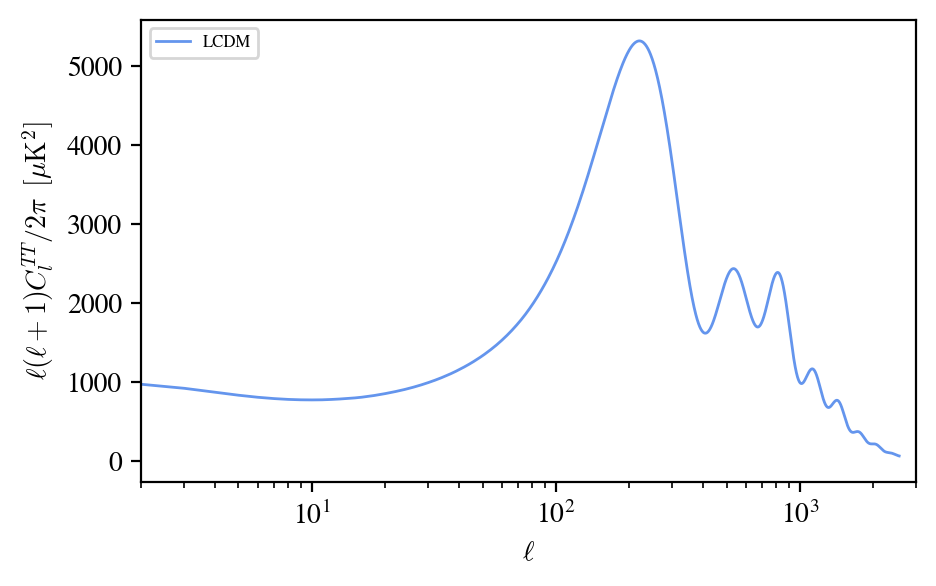

In [13]:
# ClTT
# plot ClTT
plt.figure(221, figsize=(5.0,3.0), dpi=200)
# If you want log scale:
plt.xscale('log');
#plt.yscale('log');
# If you want to change the limits of your plot
plt.xlim(2,0.3*10**4)
#plt.ylim(10**-7,8*10**4)
# Labels of the plot
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_l^{TT} / 2 \pi \,\,\, [\mu \mathrm{K}^2]$")

# LCDM
plt.plot(ells,CLTTLCDM_camb, color='cornflowerblue', linestyle='-',linewidth=1.0, label= 'LCDM',markevery=100)

plt.legend(loc='upper left',prop={'size': 6})
plt.show()

Lets add some data from Planck

In [14]:
# Get the data
!wget -O COM_PowerSpect_CMB-TT-full_R3.01.txt "http://pla.esac.esa.int/pla/aio/product-action?COSMOLOGY.FILE_ID=COM_PowerSpect_CMB-TT-full_R3.01.txt"
l, dl = np.genfromtxt('COM_PowerSpect_CMB-TT-full_R3.01.txt',usecols=(0,1),unpack=True)

--2023-06-13 17:39:46--  http://pla.esac.esa.int/pla/aio/product-action?COSMOLOGY.FILE_ID=COM_PowerSpect_CMB-TT-full_R3.01.txt
Resolving pla.esac.esa.int (pla.esac.esa.int)... 193.147.153.153
Connecting to pla.esac.esa.int (pla.esac.esa.int)|193.147.153.153|:80... connected.
HTTP request sent, awaiting response... 200 
Length: unspecified [application/x-binary]
Saving to: ‘COM_PowerSpect_CMB-TT-full_R3.01.txt’

COM_PowerSpect_CMB-     [   <=>              ] 166.55K   239KB/s    in 0.7s    

2023-06-13 17:39:48 (239 KB/s) - ‘COM_PowerSpect_CMB-TT-full_R3.01.txt’ saved [170547]



In [15]:
# planck_l = np.insert(l,0,[0,1])
# planck_dl = np.insert(dl,0,[0,0])
# errdown = np.insert(-dDl,0,[0,0])
# errup = np.insert(+dDl,0,[0,0])
ell_low, D_ell_low, errup, errdown = np.loadtxt('/content/COM_PowerSpect_CMB-TT-full_R3.01.txt', usecols=(0,1,2,3), unpack=True)

i=0
errup_low=[]
errdown_low=[]
while i<len(ell_low):
  errup_low.append(errup[i]-D_ell_low[i])
  errdown_low.append(D_ell_low[i]-errdown[i])
  i+=1

<ipython-input-16-fc203879a682>:15: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(ell_low, D_ell_low, yerr=[errdown, errup], fmt='o', markeredgecolor="0.5", markerfacecolor="0.5", ecolor="0.5", barsabove=True, elinewidth=0.5, capsize=1.9, label="$\mathrm{Planck}$", markersize=0.5, marker='s')


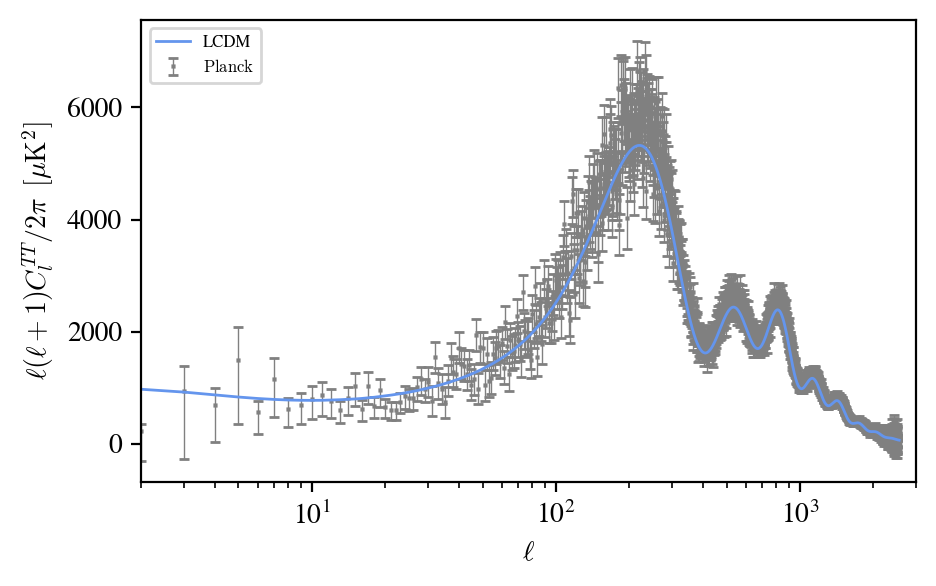

In [16]:
# ClTT
# plot ClTT
plt.figure(221, figsize=(5.0,3.0), dpi=200)
# If you want log scale:
plt.xscale('log');
#plt.yscale('log');
# If you want to change the limits of your plot
plt.xlim(2,0.3*10**4)
#plt.ylim(10**-7,8*10**4)
# Labels of the plot
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_l^{TT} / 2 \pi \,\,\, [\mu \mathrm{K}^2]$")

# Plot Planck data
plt.errorbar(ell_low, D_ell_low, yerr=[errdown, errup], fmt='o', markeredgecolor="0.5", markerfacecolor="0.5", ecolor="0.5", barsabove=True, elinewidth=0.5, capsize=1.9, label="$\mathrm{Planck}$", markersize=0.5, marker='s')

# LCDM
plt.plot(ells,CLTTLCDM_camb, color='cornflowerblue', linestyle='-',linewidth=1.0, label= 'LCDM',markevery=100)

plt.legend(loc='upper left',prop={'size': 6})
plt.show()

#### Matter power spectrum

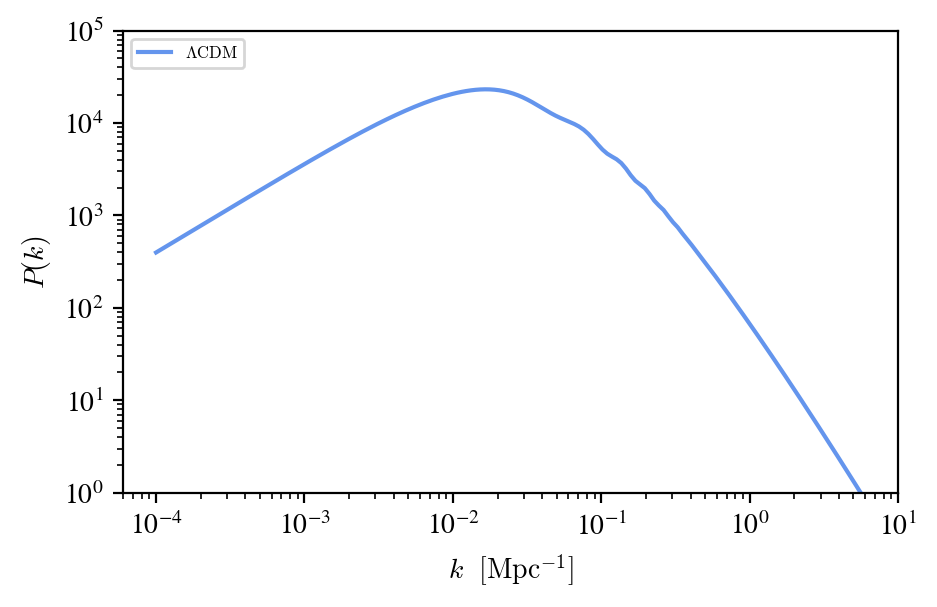

In [17]:
# CAMB
# plot P(k)
plt.figure(221, figsize=(5.0,3.0), dpi=200)
plt.xscale('log');
plt.yscale('log');
plt.xlim(6*10**-5,10)
plt.ylim(10**0,10**5)
plt.xlabel(r'$k \,\,\,\, [\mathrm{Mpc}^{-1}]$')
plt.ylabel(r'$P(k)$')
#plt.plot(kk,(1/(2*pi**2))*(kk**3)*Pk,'b-')
# CDM
plt.plot(khLCDM,pkLCDM, color='cornflowerblue', linestyle='-',linewidth=1.5,label='$\Lambda\mathrm{CDM}$')
#plt.text(0.8*10**(2), 6*10**0, 'CDM', color='cornflowerblue', alpha=1, ha='center', va='center', rotation='horizontal', fontdict=font)

plt.legend(loc='upper left',prop={'size': 6})
plt.show()

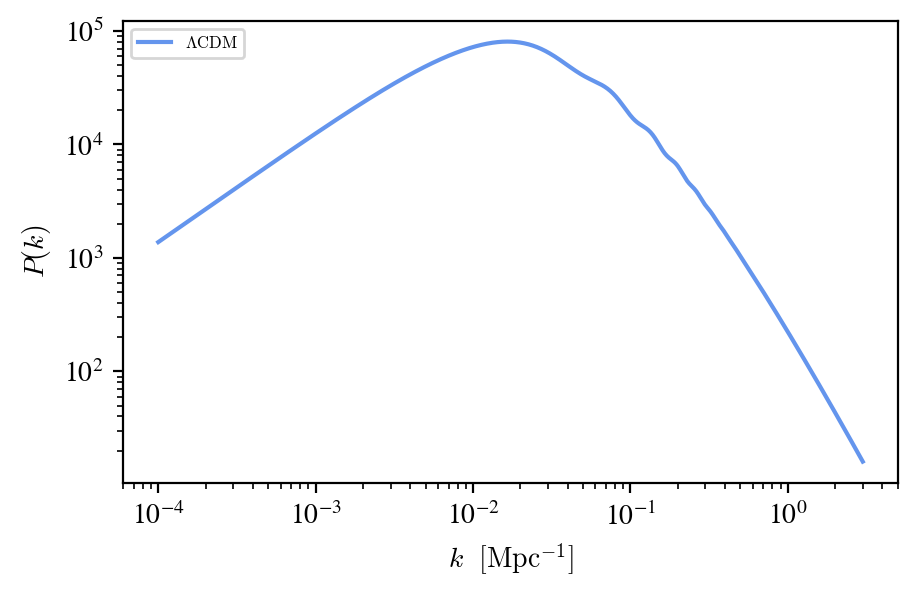

In [18]:
# CLASS
# plot P(k)
plt.figure(221, figsize=(5.0,3.0), dpi=200)
plt.xscale('log');
plt.yscale('log');
#plt.xlim(10**-4,1*10**0)
# plt.ylim(10**-10,2.5*10**2)
plt.xlabel(r'$k \,\,\,\, [\mathrm{Mpc}^{-1}]$')
plt.ylabel(r'$P(k)$')
#plt.plot(kk,(1/(2*pi**2))*(kk**3)*Pk,'b-')
# CDM
plt.plot(kk,Pk, color='cornflowerblue', linestyle='-',linewidth=1.5,label='$\Lambda\mathrm{CDM}$')
#plt.text(0.8*10**(2), 6*10**0, 'CDM', color='cornflowerblue', alpha=1, ha='center', va='center', rotation='horizontal', fontdict=font)

plt.legend(loc='upper left',prop={'size': 6})
plt.show()

Remember the figure we had in the slides

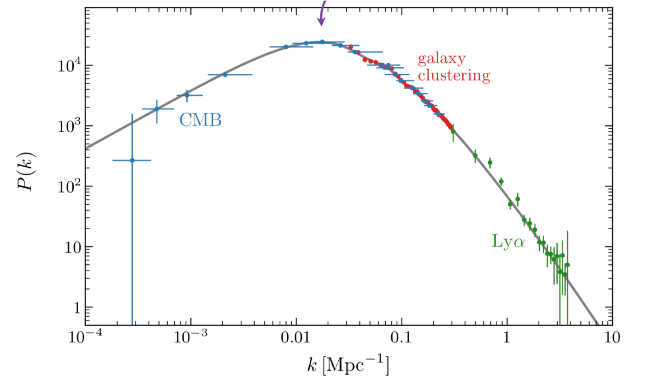

#### Dimonesionless power spectrum

The dimensionless power spectrum is given by
$$\Delta^2(k) = \frac{1}{2\pi^2} k^3 P_k$$

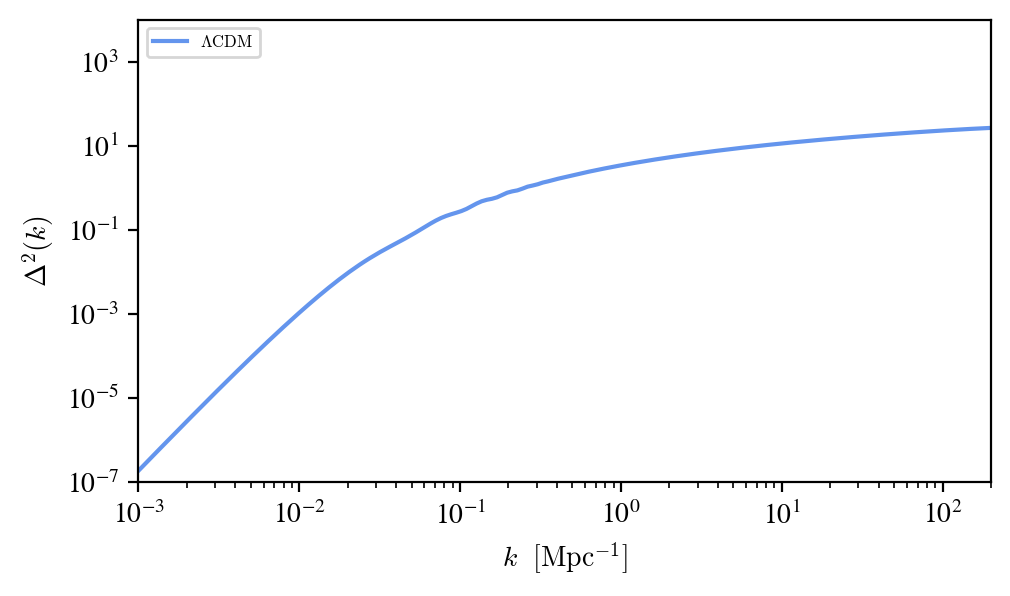

In [19]:
# plot P(k)
plt.figure(221, figsize=(5.5,3.0), dpi=200)
plt.xscale('log');
plt.yscale('log');
plt.xlim(10**-3,2*10**2)
plt.ylim(10**-7,10**4)
plt.xlabel(r'$k \,\,\,\, [\mathrm{Mpc}^{-1}]$')
plt.ylabel(r'$\Delta^2(k)$')
#plt.plot(kk,(1/(2*pi**2))*(kk**3)*Pk,'b-')
# CDM
plt.plot(khLCDM,(1/(2*pi**2))*(khLCDM**3)*pkLCDM, color='cornflowerblue', linestyle='-',linewidth=1.5,label='$\Lambda\mathrm{CDM}$')
#plt.text(0.8*10**(2), 6*10**0, 'CDM', color='cornflowerblue', alpha=1, ha='center', va='center', rotation='horizontal', fontdict=font)

plt.legend(loc='upper left',prop={'size': 6})
plt.show()

## ULDM

Until now we ran CAMB and CLASS for **LCDM**, which is included in the default version of these softwares.

But we are interested in **ULDM**. For that we have to use a modified version of the software called [**AxionCAMB**](https://github.com/dgrin1/axionCAMB) or [**AxiCLASS**](https://github.com/PoulinV/AxiCLASS). The codes are equivalent, having the same physics of ultra-light bosonic field coded in them.

Here we are going to use **AxionCAMB**.

Unfortunately, these modified codes cannot be installed using pip, like above. So we will have to install them (axionCAMB) manually here in our notebook. The procedure is easy, and it is the same if you want to install in your computer and the same for AxiCLASS.

First, lets clone (download) the last version of AxionCAMB from its git repository.

(Have the folder tab always open on the side, so you see the axionCAMB folder being downloaded)

In [20]:
!git clone --recursive https://github.com/dgrin1/axionCAMB.git

Cloning into 'axionCAMB'...
remote: Enumerating objects: 468, done.
remote: Counting objects: 100% (288/288), done.
remote: Compressing objects: 100% (206/206), done.
remote: Total 468 (delta 112), reused 244 (delta 82), pack-reused 180
Receiving objects: 100% (468/468), 12.78 MiB | 13.58 MiB/s, done.
Resolving deltas: 100% (203/203), done.


Enter the axionCAMB directory

In [21]:
cd axionCAMB

/content/axionCAMB


Let's install the code. We are going to use the command "make" that is going to install all the instructions present in the Makefile

In [22]:
!make

gfortran    -c constants.f90
gfortran    -c utils.F90
gfortran    -c subroutines.f90
gfortran    -c inifile.f90
gfortran    -c power_tilt.f90
gfortran    -c recfast_axion.f90
gfortran    -c reionization.f90
gfortran    -c modules.f90
gfortran    -c bessels.f90
gfortran    -c equations_ppf.f90
gfortran    -c halofit_ppf.f90
gfortran    -c lensing.f90
gfortran    -c SeparableBispectrum.F90
gfortran    -c cmbmain.f90
gfortran    -c camb.f90
gfortran    -c axion_background.f90
gfortran    constants.o utils.o  subroutines.o inifile.o power_tilt.o recfast_axion.o reionization.o modules.o bessels.o equations_ppf.o halofit_ppf.o lensing.o SeparableBispectrum.o cmbmain.o camb.o axion_background.o inidriver_axion.F90  -o camb


The axioncamb code is installed now. Let's choose our cosmology.

PS: You can always use the following commands - same as in a terminal

*pwd- shows you in which folder you are*

*ls - shows all that is contained in the folder you are in*

In [23]:
ls

amlutils.mod                              lenspen.f90
axion_background.f90                      license.txt
axion_background.mod                      lists.mod
axion_background.o                        lvalues.mod
bessels.f90                               Makefile
bessels.o                                 MakefileCAMB
bispectrum.mod                            MakefileCosmosis
bugfix_compare.ipynb                      Makefile_main
camb*                                     massivenu.mod
camb.dSYM.zip                             Matrix_utils.F90
camb.f90                                  modeldata.mod
cambmain.mod                              modelparams.mod
camb.mod                                  modules.f90
camb.o                                    modules.o
cmbmain.f90                               nonlinear.mod
cmbmain.o                                 params.ini
cmbmainOMP.f90                            power_tilt.f90
constants.f90                             power_tilt.o
constants

Now, we have to set our cosmological parameters.

Create a new ini file, where we are going to add our ultra-light field. You can see on the side tab your new file being created.

PS: Take some time to explore the .ini file to see all the possibilities you can change.

In [24]:
cp params.ini inifiles/Fuzzy_22.ini

Lets edit the new file: Fuzzy_22.ini
Click twice on the file on the left bar to open the file. It should open on the right of your screen.

Go to line 45 to 60, where you will find:

```
#Axion variables
# Mass is in units eV
use_axfrac=T #T to use ULDM as a fraction of DM and F to use ULDM as 100% of DM
#now we will ignore omaxh2 if use_axfrac=T
axion_isocurvature=F
alpha_ax = 0
Hinf=13.7 #Log Hinflation  in GeV

#Axion variables
# Mass is in units eV
omaxh2 = 0.000001
m_ax = 1.e-18

# if use_axfrac = T set parameters as here, ignored if use_axfrac=F
omdah2 = 0.119
axfrac = 0.01 # Change here the fraction of ULDM, if you want to change the fraction
```

First case we are going to do is: a FDM with mass $10^{-22}\,\mathrm{eV}$.

Change **lines**:

**47**: F

**55**: 0.112274

**56**: 1.e-22

The change in line 49 I put all the DM density into FDM. SO 100% of DM is in the form of ULDM (FDM).

So, also change:

**36**: omch2 = .000001

So we can calculate the PS until small scales, change the max k:

**26**: k_eta_max_scalar  = 1e10 (for m=1e-22, 1e-24), 1e6 (for m=1e-26)

(Don't change the fraction now!)

Chenge also the output name in line 4 "output_root". I changed to:

`output_root = output/Fuzzy22`

Total: 6 changes (lines: 4, 26, 26, 47, 55, 56)

Now, let's run axionCAMB (it has to be in the /content/axionCAMB/ folder, where the code is)

In [25]:
pwd

'/content/axionCAMB'

Create an output file

In [26]:
mkdir output

In [29]:
!./camb /content/axionCAMB/inifiles/Fuzzy_22.ini

(w0, wa) = (-1.00000,  0.00000)
Reion redshift       =   9.779
Om_b h^2             =  0.022220
Om_c h^2             =  0.000001
Om_nu h^2            =  0.000600
Om_Lambda            =  0.701739
H0                  = 67.310000
Om_ax h^2            =  0.112274
a_osc               =  0.53E-06
ma/eV            =  0.10E-21
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.298261
100 theta (CosmoMC)  =  1.033035
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  14.024
zstar                =  1089.40
r_s(zstar)/Mpc       =  146.64
100*theta            =  1.033183
zdrag                =  1059.09
r_s(zdrag)/Mpc       =  149.40
k_D(zstar) Mpc       =  0.1386
100*theta_D          =  0.159708
tau_recomb/Mpc       =  284.98  tau_now/Mpc =  14477.9
 at z =    0.00000000      sigma8 (all matter)=  0.797462940    
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FL

Run for a few more masses of FDM. You can choose the masses you want here. Give it a try.

In this example, I am going to choose: $m = 10^{-26}, 10^{-24}, 10^{-23}, 10^{-22} \, \mathrm{eV}$

In [ ]:
#masses = [1e-26,1e-24,1e-20]


In [30]:
pwd

'/content/axionCAMB'

In [31]:
cp inifiles/Fuzzy_22.ini inifiles/Fuzzy_26.ini

In [32]:
cp inifiles/Fuzzy_22.ini inifiles/Fuzzy_24.ini

In [33]:
cp inifiles/Fuzzy_22.ini inifiles/Fuzzy_23.ini

Dont'forget to set the **mass** (line 56), **output root** (line 4) and **k_eta_max_scalar** (line 26 - the larger the mass, the larger k max has to be) in the .ini files

####Run Axion CAMB

In [34]:
!./camb /content/axionCAMB/inifiles/Fuzzy_23.ini

(w0, wa) = (-1.00000,  0.00000)
Reion redshift       =   9.779
Om_b h^2             =  0.022220
Om_c h^2             =  0.000001
Om_nu h^2            =  0.000600
Om_Lambda            =  0.701739
H0                  = 67.310000
Om_ax h^2            =  0.112274
a_osc               =  0.17E-05
ma/eV            =  0.10E-22
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.298261
100 theta (CosmoMC)  =  1.033038
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  14.024
zstar                =  1089.40
r_s(zstar)/Mpc       =  146.64
100*theta            =  1.033186
zdrag                =  1059.09
r_s(zdrag)/Mpc       =  149.39
k_D(zstar) Mpc       =  0.1386
100*theta_D          =  0.159708
tau_recomb/Mpc       =  284.98  tau_now/Mpc =  14477.8
 at z =    0.00000000      sigma8 (all matter)=  0.797157347    
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FL

In [35]:
!./camb /content/axionCAMB/inifiles/Fuzzy_24.ini

(w0, wa) = (-1.00000,  0.00000)
Reion redshift       =   9.779
Om_b h^2             =  0.022220
Om_c h^2             =  0.000001
Om_nu h^2            =  0.000600
Om_Lambda            =  0.701739
H0                  = 67.310000
Om_ax h^2            =  0.112274
a_osc               =  0.53E-05
ma/eV            =  0.10E-23
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.298261
100 theta (CosmoMC)  =  1.033036
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  14.024
zstar                =  1089.40
r_s(zstar)/Mpc       =  146.64
100*theta            =  1.033184
zdrag                =  1059.09
r_s(zdrag)/Mpc       =  149.40
k_D(zstar) Mpc       =  0.1386
100*theta_D          =  0.159708
tau_recomb/Mpc       =  284.98  tau_now/Mpc =  14477.9
 at z =    0.00000000      sigma8 (all matter)=  0.791610837    
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FL

In [36]:
!./camb /content/axionCAMB/inifiles/Fuzzy_26.ini

(w0, wa) = (-1.00000,  0.00000)
Reion redshift       =   9.743
Om_b h^2             =  0.022220
Om_c h^2             =  0.000001
Om_nu h^2            =  0.000600
Om_Lambda            =  0.701739
H0                  = 67.310000
Om_ax h^2            =  0.112274
a_osc               =  0.55E-04
ma/eV            =  0.10E-25
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.298261
100 theta (CosmoMC)  =  1.032748
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  14.078
zstar                =  1089.27
r_s(zstar)/Mpc       =  147.32
100*theta            =  1.032984
zdrag                =  1058.98
r_s(zdrag)/Mpc       =  150.08
k_D(zstar) Mpc       =  0.1382
100*theta_D          =  0.159445
tau_recomb/Mpc       =  286.04  tau_now/Mpc =  14547.2
 at z =    0.00000000      sigma8 (all matter)=  0.358194411    
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FL

First we need to copy to variable the result of our runs from the output files.

In [37]:
from pylab import *
#Cl
Fuzzyell22, FuzzyCl22 = loadtxt('/content/axionCAMB/output/Fuzzy22_scalCls.dat', usecols=(0,1), unpack=True)
Fuzzyell23, FuzzyCl23 = loadtxt('/content/axionCAMB/output/Fuzzy23_scalCls.dat', usecols=(0,1), unpack=True)
Fuzzyell24, FuzzyCl24 = loadtxt('/content/axionCAMB/output/Fuzzy24_scalCls.dat', usecols=(0,1), unpack=True)
Fuzzyell26, FuzzyCl26 = loadtxt('/content/axionCAMB/output/Fuzzy26_scalCls.dat', usecols=(0,1), unpack=True)

# Matter power spectrum
Fuzzyk22, FuzzyPk22 = loadtxt('/content/axionCAMB/output/Fuzzy22_matterpower.dat', usecols=(0,1), unpack=True)
Fuzzyk23, FuzzyPk23 = loadtxt('/content/axionCAMB/output/Fuzzy23_matterpower.dat', usecols=(0,1), unpack=True)
Fuzzyk24, FuzzyPk24 = loadtxt('/content/axionCAMB/output/Fuzzy24_matterpower.dat', usecols=(0,1), unpack=True)
Fuzzyk26, FuzzyPk26 = loadtxt('/content/axionCAMB/output/Fuzzy26_matterpower.dat', usecols=(0,1), unpack=True)


###Plot

Let's plot the result, together with LCDM to compare.

ClTT

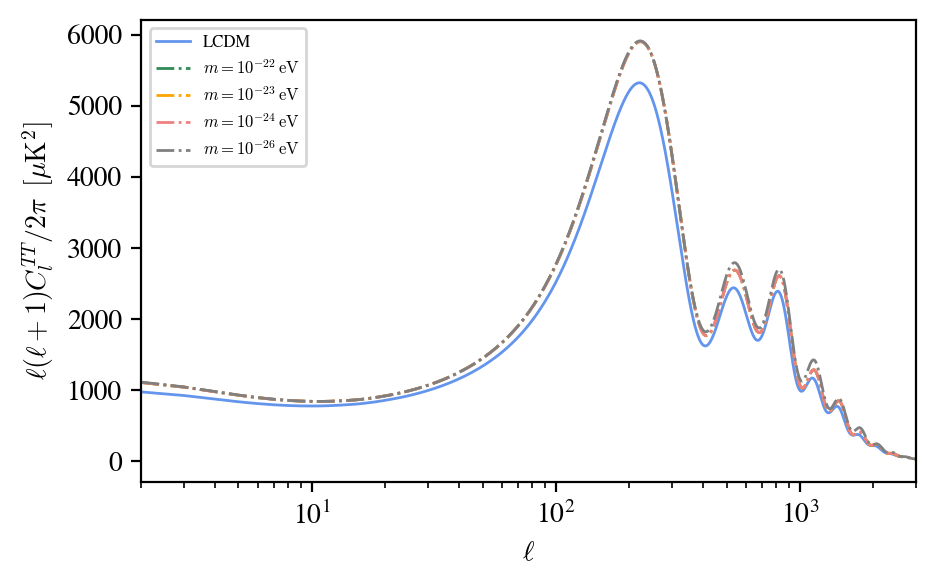

In [38]:
# ClTT
# plot ClTT
plt.figure(221, figsize=(5.0,3.0), dpi=200)
# If you want log scale:
plt.xscale('log');
#plt.yscale('log');
# If you want to change the limits of your plot
plt.xlim(2,0.3*10**4)
#plt.ylim(10**-7,8*10**4)
# Labels of the plot
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_l^{TT} / 2 \pi \,\,\, [\mu \mathrm{K}^2]$")

# LCDM
plt.plot(ells,CLTTLCDM_camb, color='cornflowerblue', linestyle='-',linewidth=1.0, label= 'LCDM',markevery=100)

# Fuzzy DM
plt.plot(Fuzzyell22,FuzzyCl22, color='seagreen', linestyle='-.',linewidth=1,label='$m= 10^{-22}\,\mathrm{eV}$')
plt.plot(Fuzzyell23,FuzzyCl23, color='orange', linestyle='-.',linewidth=1,label='$m= 10^{-23}\,\mathrm{eV}$')
plt.plot(Fuzzyell24,FuzzyCl24, color='lightcoral', linestyle='-.',linewidth=1,label='$m=  10^{-24}\,\mathrm{eV}$')
plt.plot(Fuzzyell26,FuzzyCl26, color='gray', linestyle='-.',linewidth=1,label='$m=  10^{-26}\,\mathrm{eV}$')


plt.legend(loc='upper left',prop={'size': 6})
plt.show()

Matter power spectrum

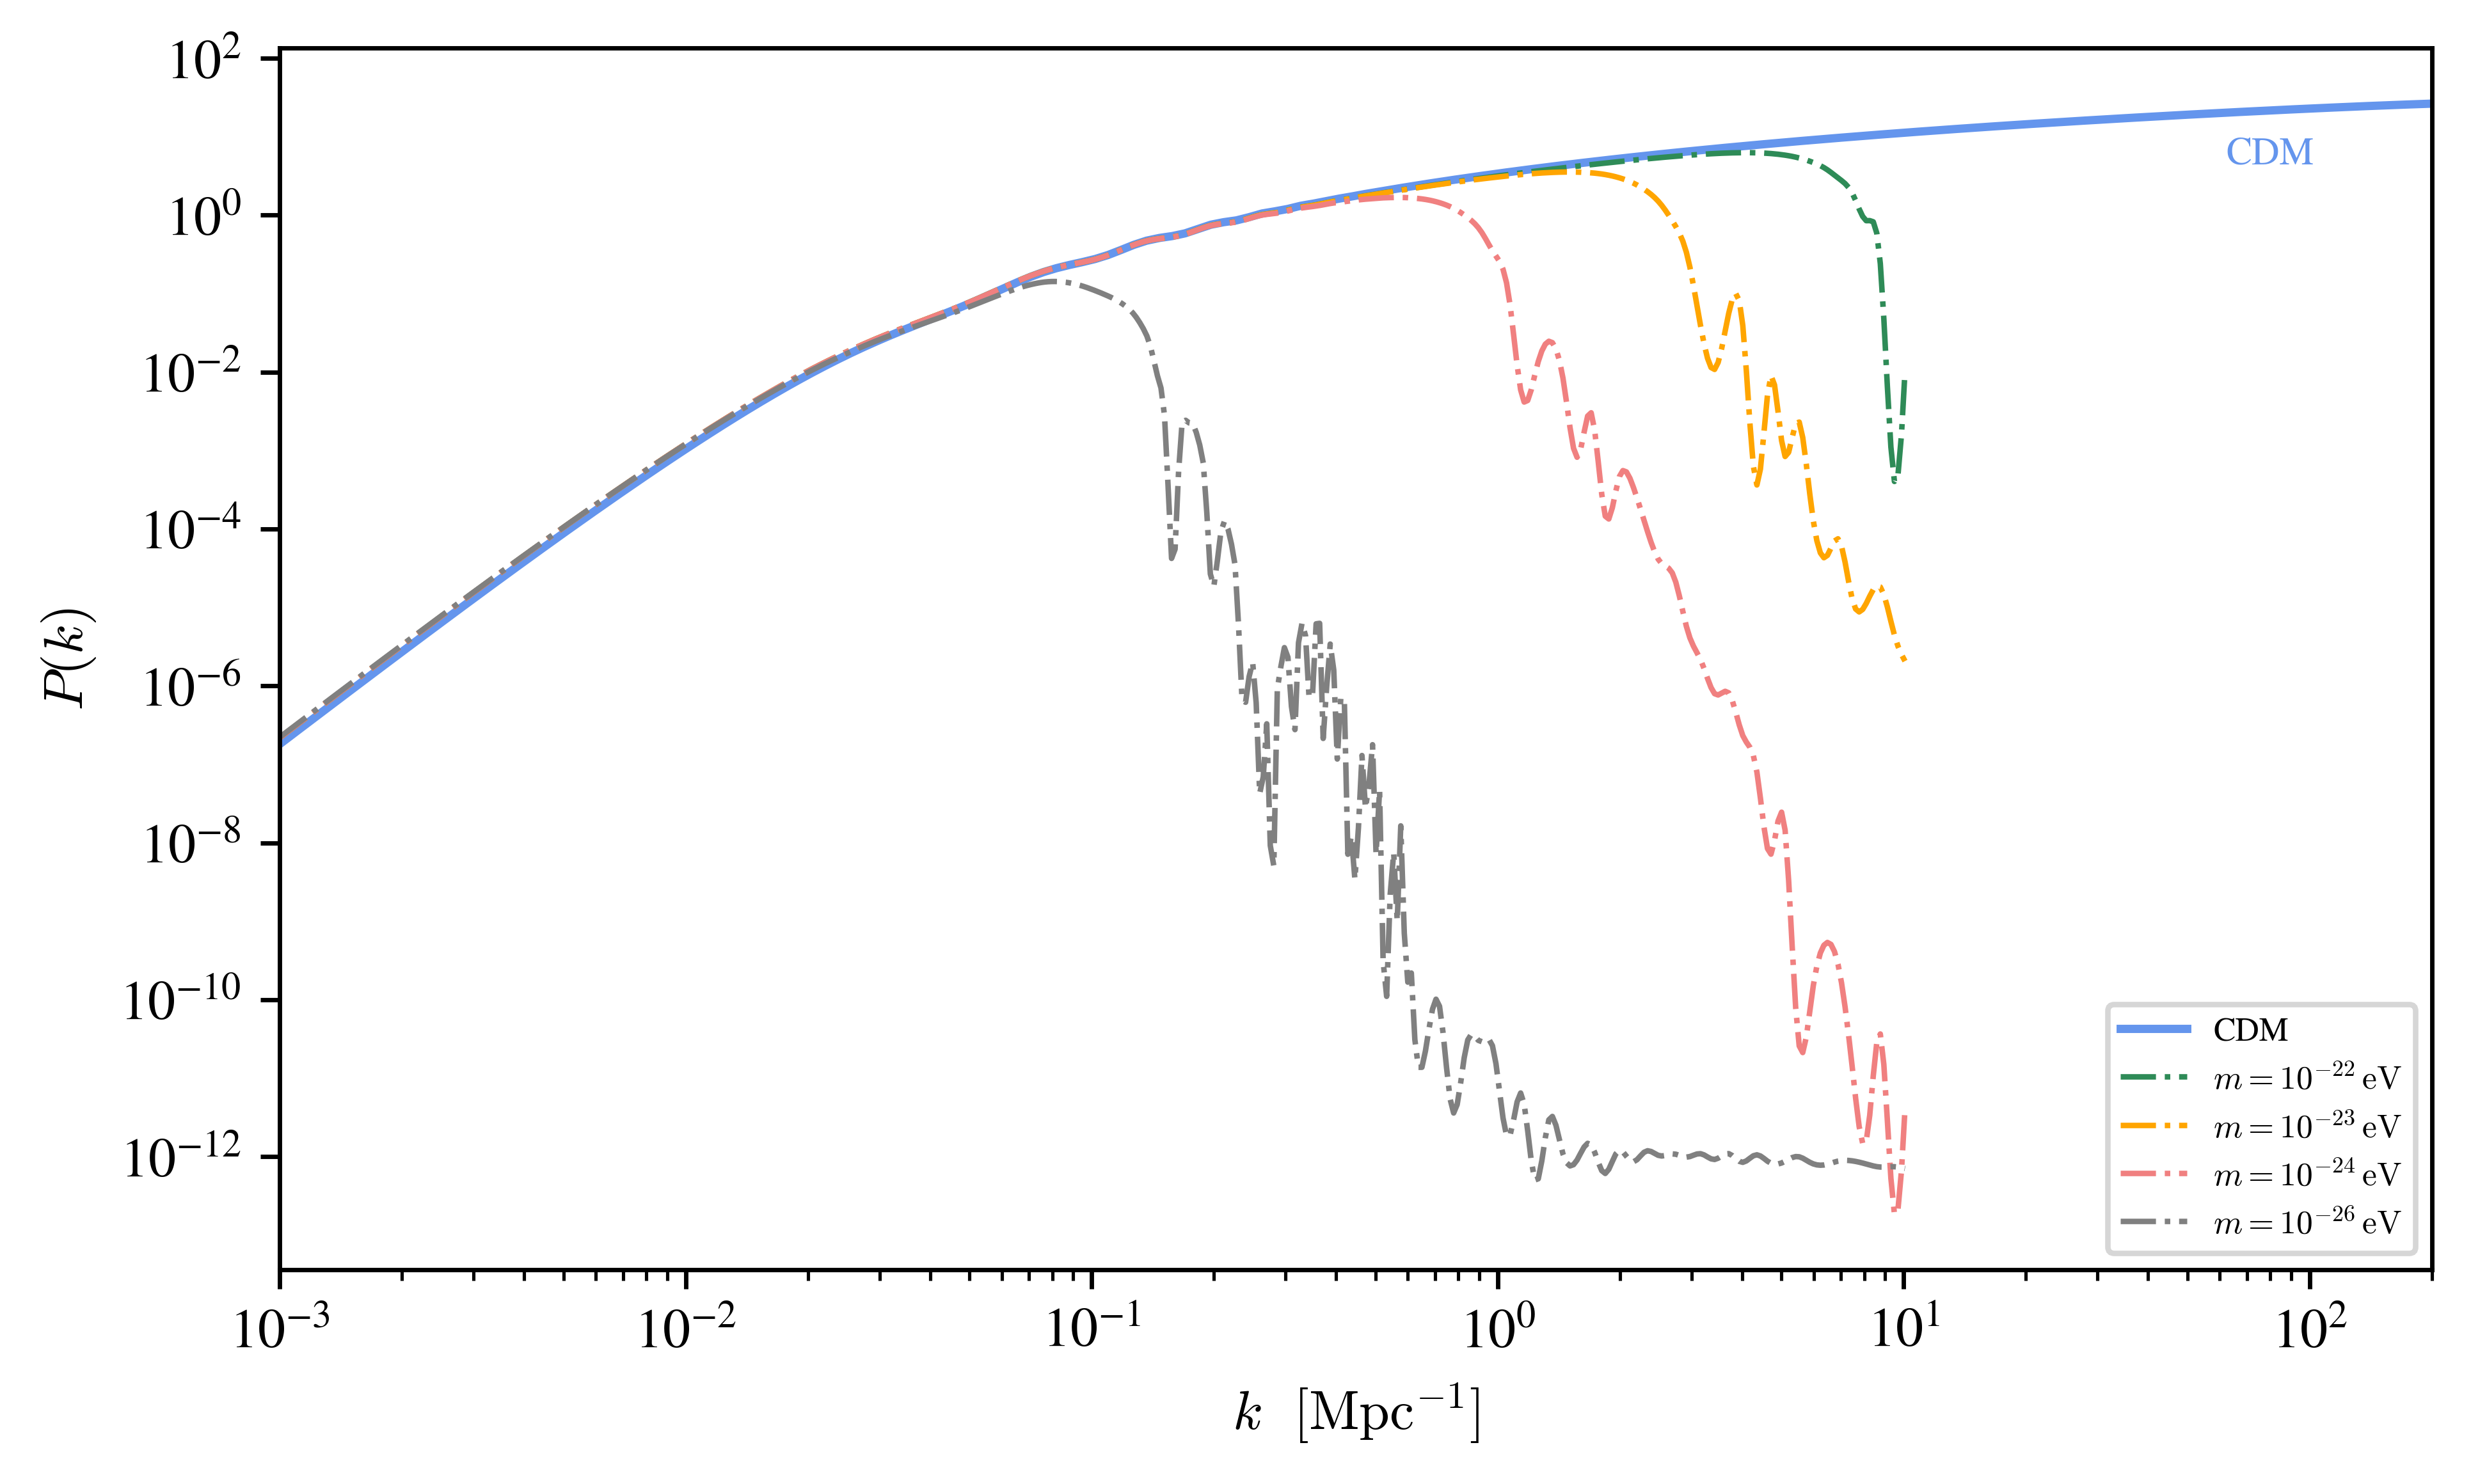

In [39]:
# plot P(k)
plt.figure(221, figsize=(7.0,4.0), dpi=620)
plt.xscale('log');
plt.yscale('log');
plt.xlim(10**-3,2*10**2)
#plt.ylim(10**-7,5*10**4)
plt.xlabel(r'$k \,\,\,\, [\mathrm{Mpc}^{-1}]$')
plt.ylabel(r'$P(k)$')
#plt.plot(kk,(1/(2*pi**2))*(kk**3)*Pk,'b-')
# CDM
plt.plot(khLCDM,(1/(2*pi**2))*(khLCDM**3)*pkLCDM, color='cornflowerblue', linestyle='-',linewidth=1.5,label='CDM')
plt.text(0.8*10**(2), 6*10**0, 'CDM', color='cornflowerblue', alpha=1, ha='center', va='center', rotation='horizontal', fontdict=font)

#Fuzzy DM
plt.plot(Fuzzyk22,(1/(2*pi**2))*(Fuzzyk22**3)*FuzzyPk22, color='seagreen', linestyle='-.',linewidth=1,label='$m= 10^{-22}\,\mathrm{eV}$')
plt.plot(Fuzzyk23,(1/(2*pi**2))*(Fuzzyk23**3)*FuzzyPk23, color='orange', linestyle='-.',linewidth=1,label='$m= 10^{-23}\,\mathrm{eV}$')
plt.plot(Fuzzyk24,(1/(2*pi**2))*(Fuzzyk24**3)*FuzzyPk24, color='lightcoral', linestyle='-.',linewidth=1,label='$m=  10^{-24}\,\mathrm{eV}$')
plt.plot(Fuzzyk26,(1/(2*pi**2))*(Fuzzyk26**3)*FuzzyPk26, color='gray', linestyle='-.',linewidth=1,label='$m=  10^{-26}\,\mathrm{eV}$')

plt.legend(loc='lower right',prop={'size': 6})
plt.show()

Remember the figure we had on the slides:
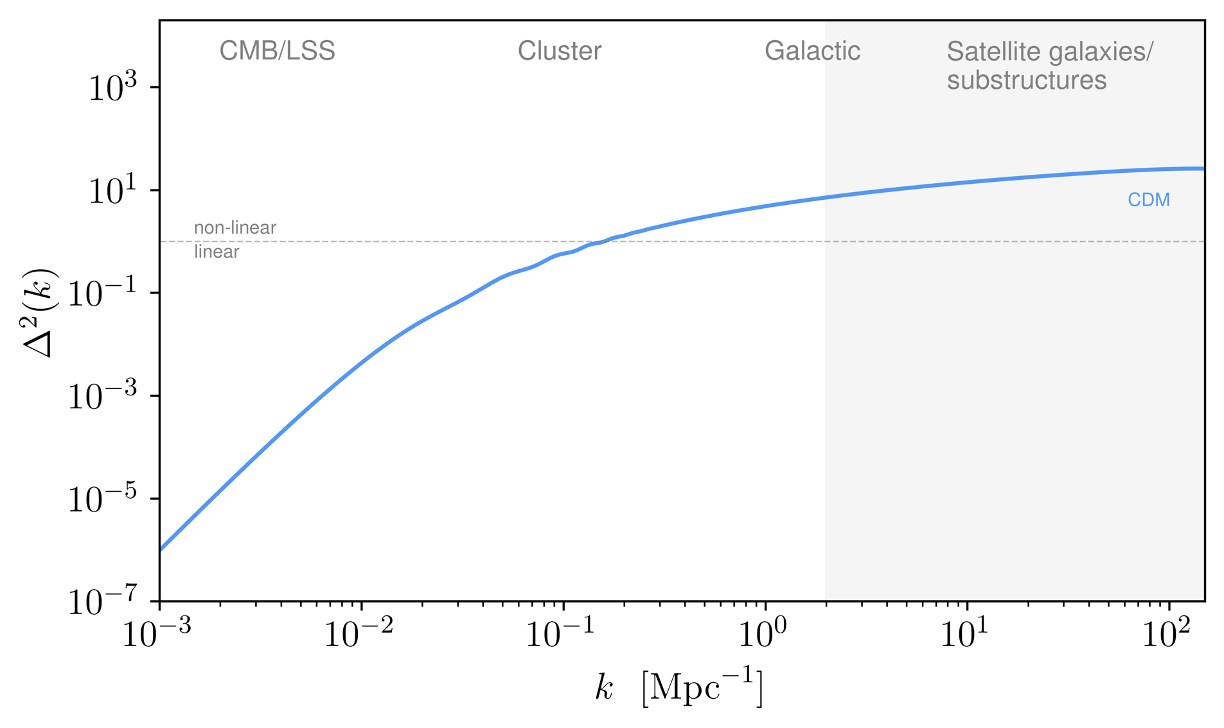
Looks the same! Nice!

Now, lets add the same labels as we had in the figure in the slides to help guide our eyes

/usr/local/lib/python3.10/dist-packages/matplotlib/scale.py:253: RuntimeWarning: overflow encountered in power
  return np.power(self.base, a)


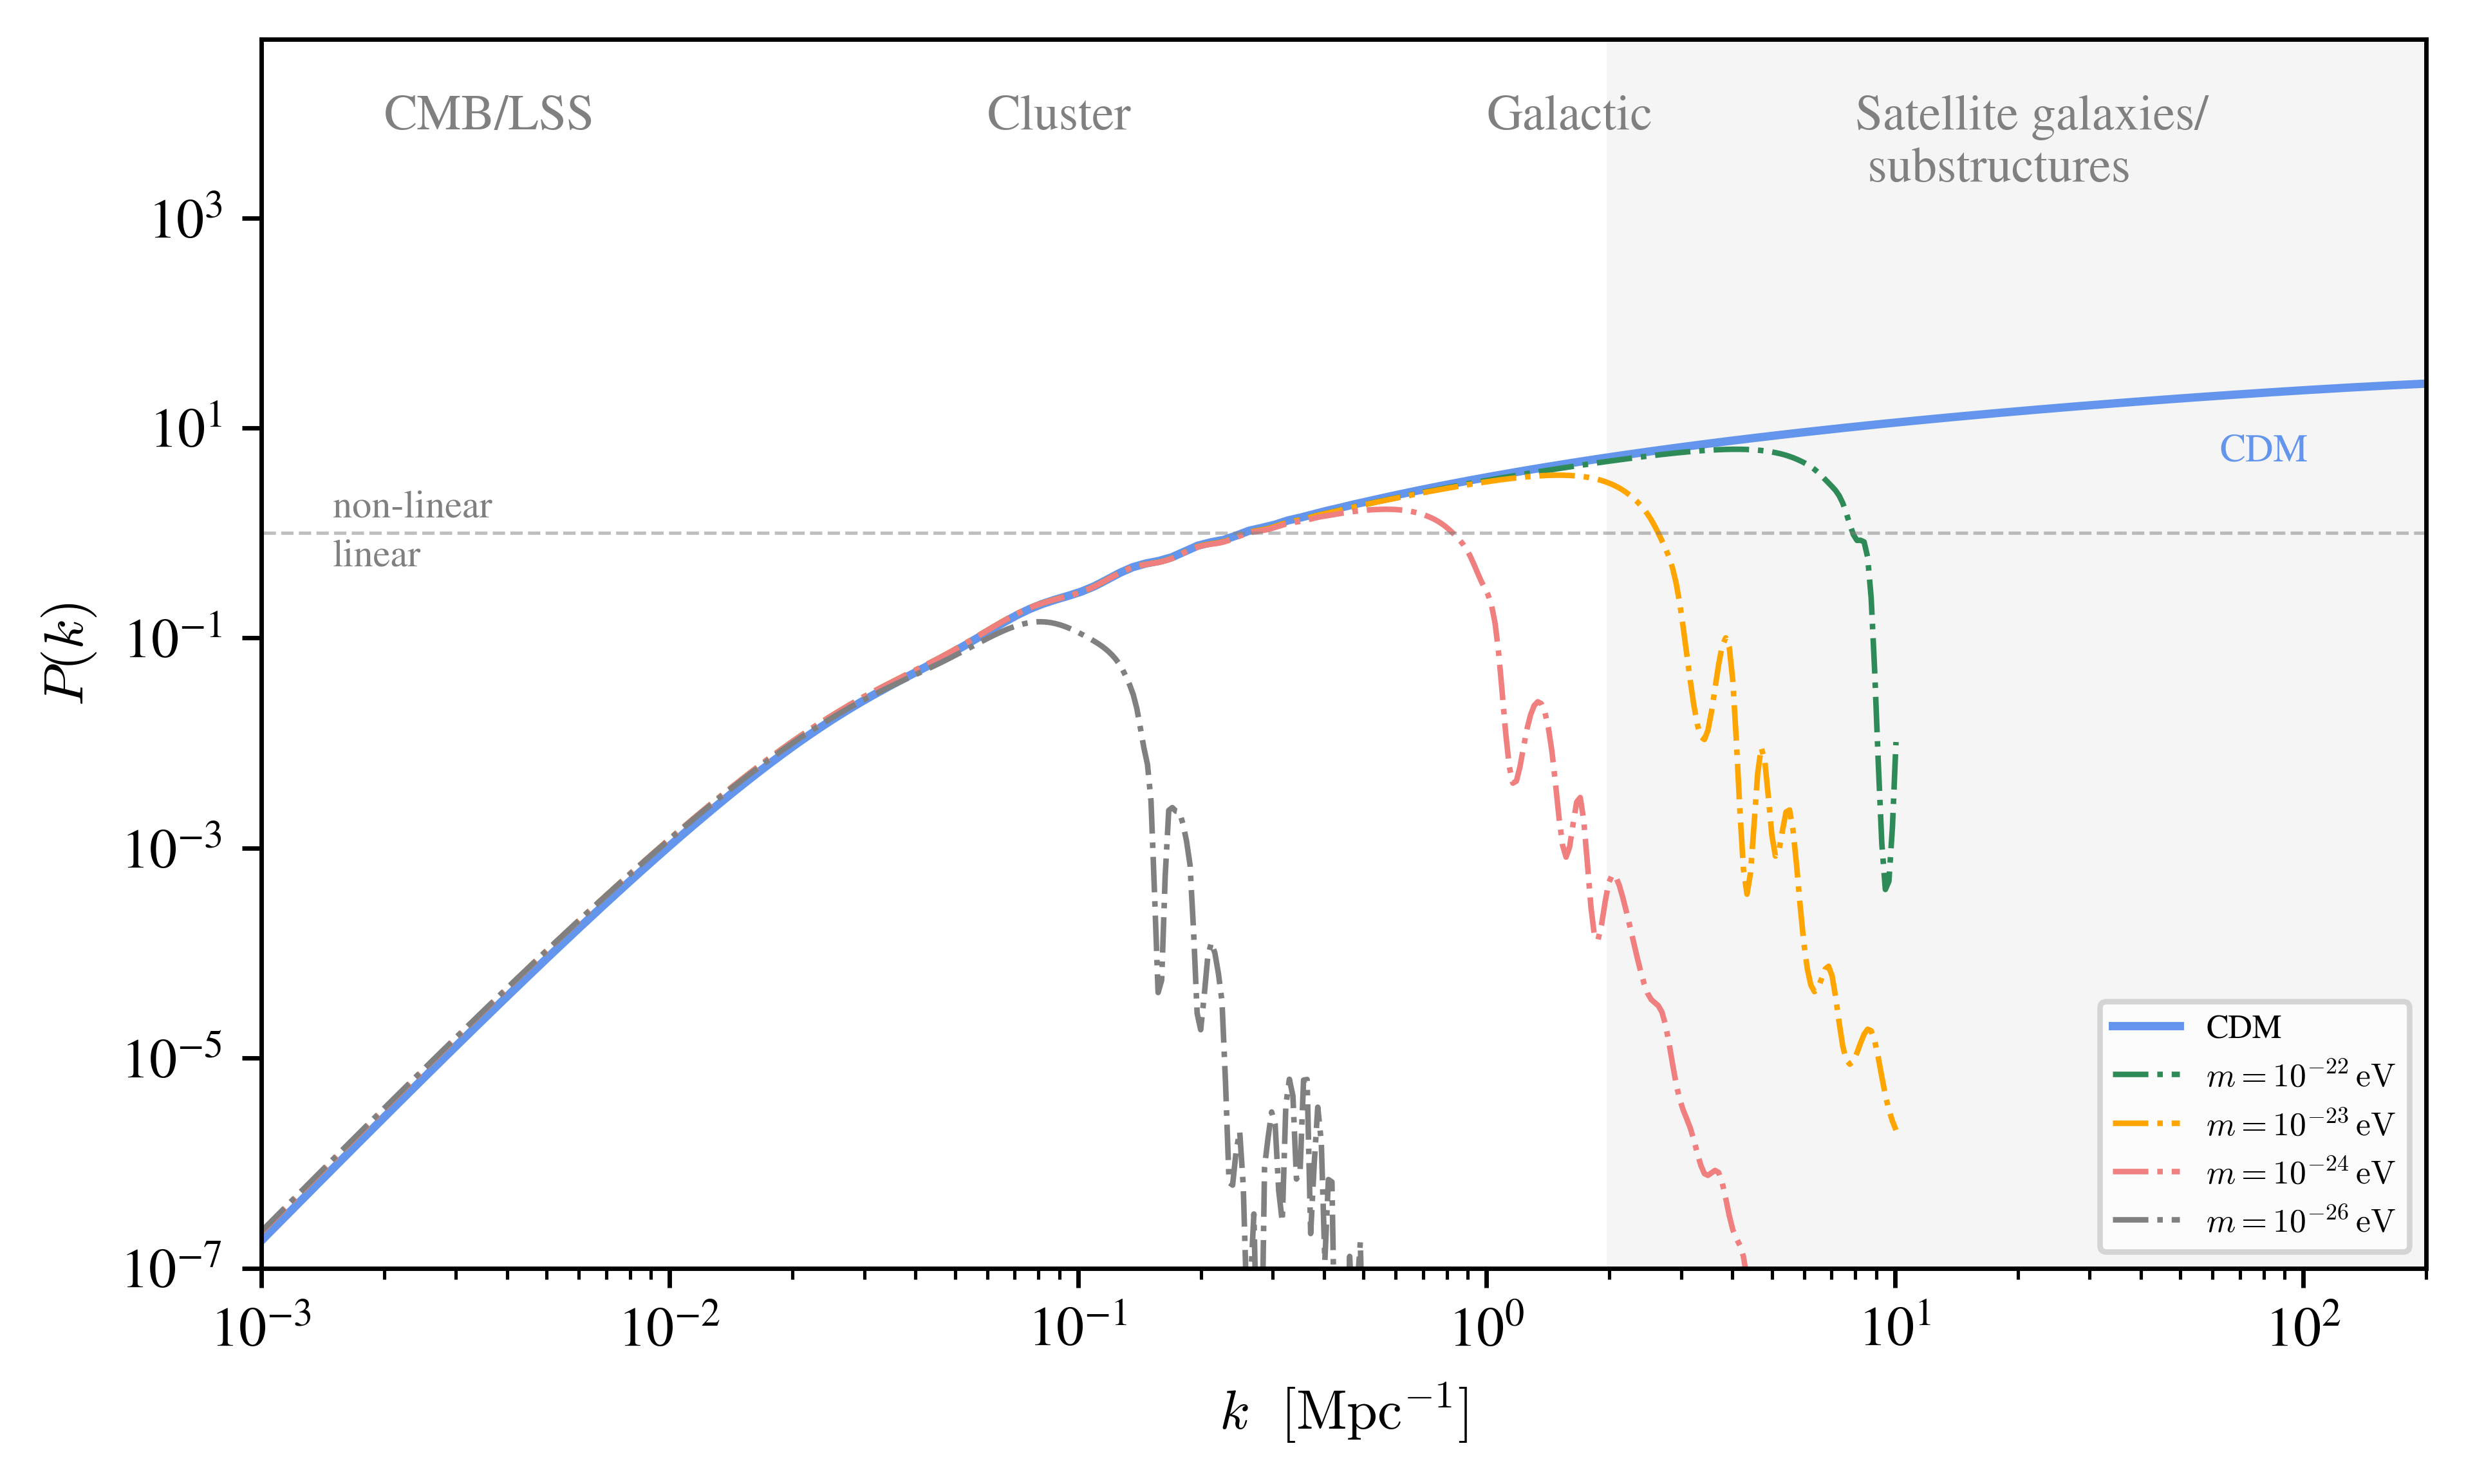

In [40]:
# plot P(k)
plt.figure(221, figsize=(7.0,4.0), dpi=620)
plt.xscale('log');
plt.yscale('log');
plt.xlim(10**-3,2*10**2)
plt.ylim(10**-7,5*10**4)
plt.xlabel(r'$k \,\,\,\, [\mathrm{Mpc}^{-1}]$')
plt.ylabel(r'$P(k)$')
#plt.plot(kk,(1/(2*pi**2))*(kk**3)*Pk,'b-')
# CDM
plt.plot(khLCDM,(1/(2*pi**2))*(khLCDM**3)*pkLCDM, color='cornflowerblue', linestyle='-',linewidth=1.5,label='CDM')
plt.text(0.8*10**(2), 6*10**0, 'CDM', color='cornflowerblue', alpha=1, ha='center', va='center', rotation='horizontal', fontdict=font)

#Fuzzy DM
plt.plot(Fuzzyk22,(1/(2*pi**2))*(Fuzzyk22**3)*FuzzyPk22, color='seagreen', linestyle='-.',linewidth=1,label='$m= 10^{-22}\,\mathrm{eV}$')
plt.plot(Fuzzyk23,(1/(2*pi**2))*(Fuzzyk23**3)*FuzzyPk23, color='orange', linestyle='-.',linewidth=1,label='$m= 10^{-23}\,\mathrm{eV}$')
plt.plot(Fuzzyk24,(1/(2*pi**2))*(Fuzzyk24**3)*FuzzyPk24, color='lightcoral', linestyle='-.',linewidth=1,label='$m=  10^{-24}\,\mathrm{eV}$')
plt.plot(Fuzzyk26,(1/(2*pi**2))*(Fuzzyk26**3)*FuzzyPk26, color='gray', linestyle='-.',linewidth=1,label='$m=  10^{-26}\,\mathrm{eV}$')

# Adding the lines and text
# horizontal; linear vs non-linear
plt.text(1.5*10**(-3), 1.75, 'non-linear', color='gray', ha='left', va='center', rotation='horizontal', fontdict=font)
plt.text(1.5*10**(-3), 0.6, 'linear', color='gray', ha='left', va='center', rotation='horizontal', fontdict=font)
plt.axhline(1, 10**-3,10**3, color='gray', linestyle='--', alpha=0.5, linewidth=0.6)

# Scale
plt.text(2*10**(-3), 1.5*10**4, 'CMB/LSS', color='gray', ha='left', va='top', rotation='horizontal', fontdict=font5)
plt.text(6*10**(-2), 1.5*10**4, 'Cluster', color='gray', ha='left', va='top', rotation='horizontal', fontdict=font5)
plt.text(1*10**(0), 1.5*10**4, 'Galactic', color='gray', ha='left', va='top', rotation='horizontal', fontdict=font5)
plt.text(8*10**(0), 1.5*10**4, 'Satellite galaxies/\n substructures', color='gray', ha='left', va='top', rotation='horizontal', fontdict=font5)

# vertical separation scales
plt.axvspan(2, 10**3, color='whitesmoke')

plt.legend(loc='lower right',prop={'size': 6})
plt.show()

### **Question**: What is the allowed mass for FDM? Try to estimate visually. If you need plot more PS for different values of the mass.

Remember the figure we had in the slides. We have precise measurements for $k < 10\, \mathrm{Mpc}^{-1}$

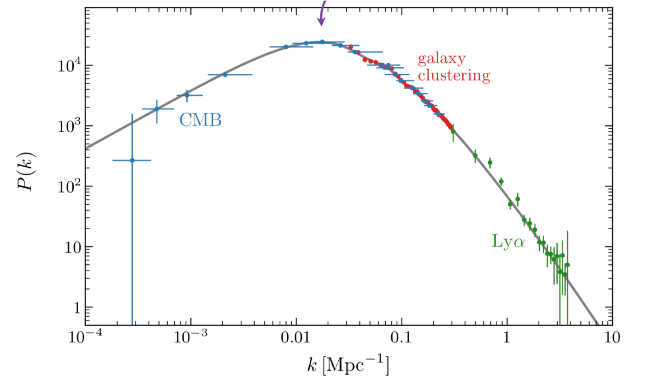

Does it agree with the bounds we found from CMB and LSS? See slides

A) $m = 10^{-26} \, \mathrm{eV}$

B) $m = 10^{-24} \, \mathrm{eV}$

C) $m = 10^{-23} \, \mathrm{eV}$

D) $m = 10^{-22} \, \mathrm{eV}$

### Degeneracy 1

####Transfer function

We can also plot the transfer function

$$P_{\mathrm{FDM}}(k) = T^2_{\mathrm{FDM}}(k) \left( \frac{D(z)}{D(0)} \right)^2 P_{\mathrm{\Lambda CDM}}(k)$$

The transfer function must already have been outputted from our runs. If not, open the .ini file again again chage line 10 to `get_transfer   = T`


In [ ]:
Let's run a LCDM i

Let's run a LCDM instance

Change **output root** (line 4) to output/LCDM; and k_eta_max_scalar  (line 26) to 100000

In [67]:
cp inifiles/Fuzzy_22.ini inifiles/LCDM.ini

In [69]:
!./camb /content/axionCAMB/inifiles/LCDM.ini

(w0, wa) = (-1.00000,  0.00000)
Reion redshift       =   9.779
Om_b h^2             =  0.022220
Om_c h^2             =  0.112274
Om_nu h^2            =  0.000600
Om_Lambda            =  0.701739
H0                  = 67.310000
Om_ax h^2            =  0.000001
a_osc               =  0.53E-09
ma/eV            =  0.10E-15
Om_K                 =  0.000000
Om_m (1-Om_K-Om_L)   =  0.298261
100 theta (CosmoMC)  =  1.033039
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  14.024
zstar                =  1089.40
r_s(zstar)/Mpc       =  146.64
100*theta            =  1.033186
zdrag                =  1059.09
r_s(zdrag)/Mpc       =  149.39
k_D(zstar) Mpc       =  0.1386
100*theta_D          =  0.159709
tau_recomb/Mpc       =  284.98  tau_now/Mpc =  14477.8
 at z =    0.00000000      sigma8 (all matter)=  0.797495008    
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FL

In [70]:
#LCDM
kTk, Tk = loadtxt('/content/axionCAMB/output/LCDM_transfer_out.dat', usecols=(0,1), unpack=True)
k, Pk = loadtxt('/content/axionCAMB/output/LCDM_matterpower.dat', usecols=(0,1), unpack=True)

# FDM
Fuzzyk22T, FuzzyTk22 = loadtxt('/content/axionCAMB/output/Fuzzy22_transfer_out.dat', usecols=(0,1), unpack=True)
Fuzzyk23T, FuzzyTk23 = loadtxt('/content/axionCAMB/output/Fuzzy23_transfer_out.dat', usecols=(0,1), unpack=True)
Fuzzyk24T, FuzzyTk24 = loadtxt('/content/axionCAMB/output/Fuzzy24_transfer_out.dat', usecols=(0,1), unpack=True)
Fuzzyk26T, FuzzyTk26 = loadtxt('/content/axionCAMB/output/Fuzzy26_transfer_out.dat', usecols=(0,1), unpack=True)


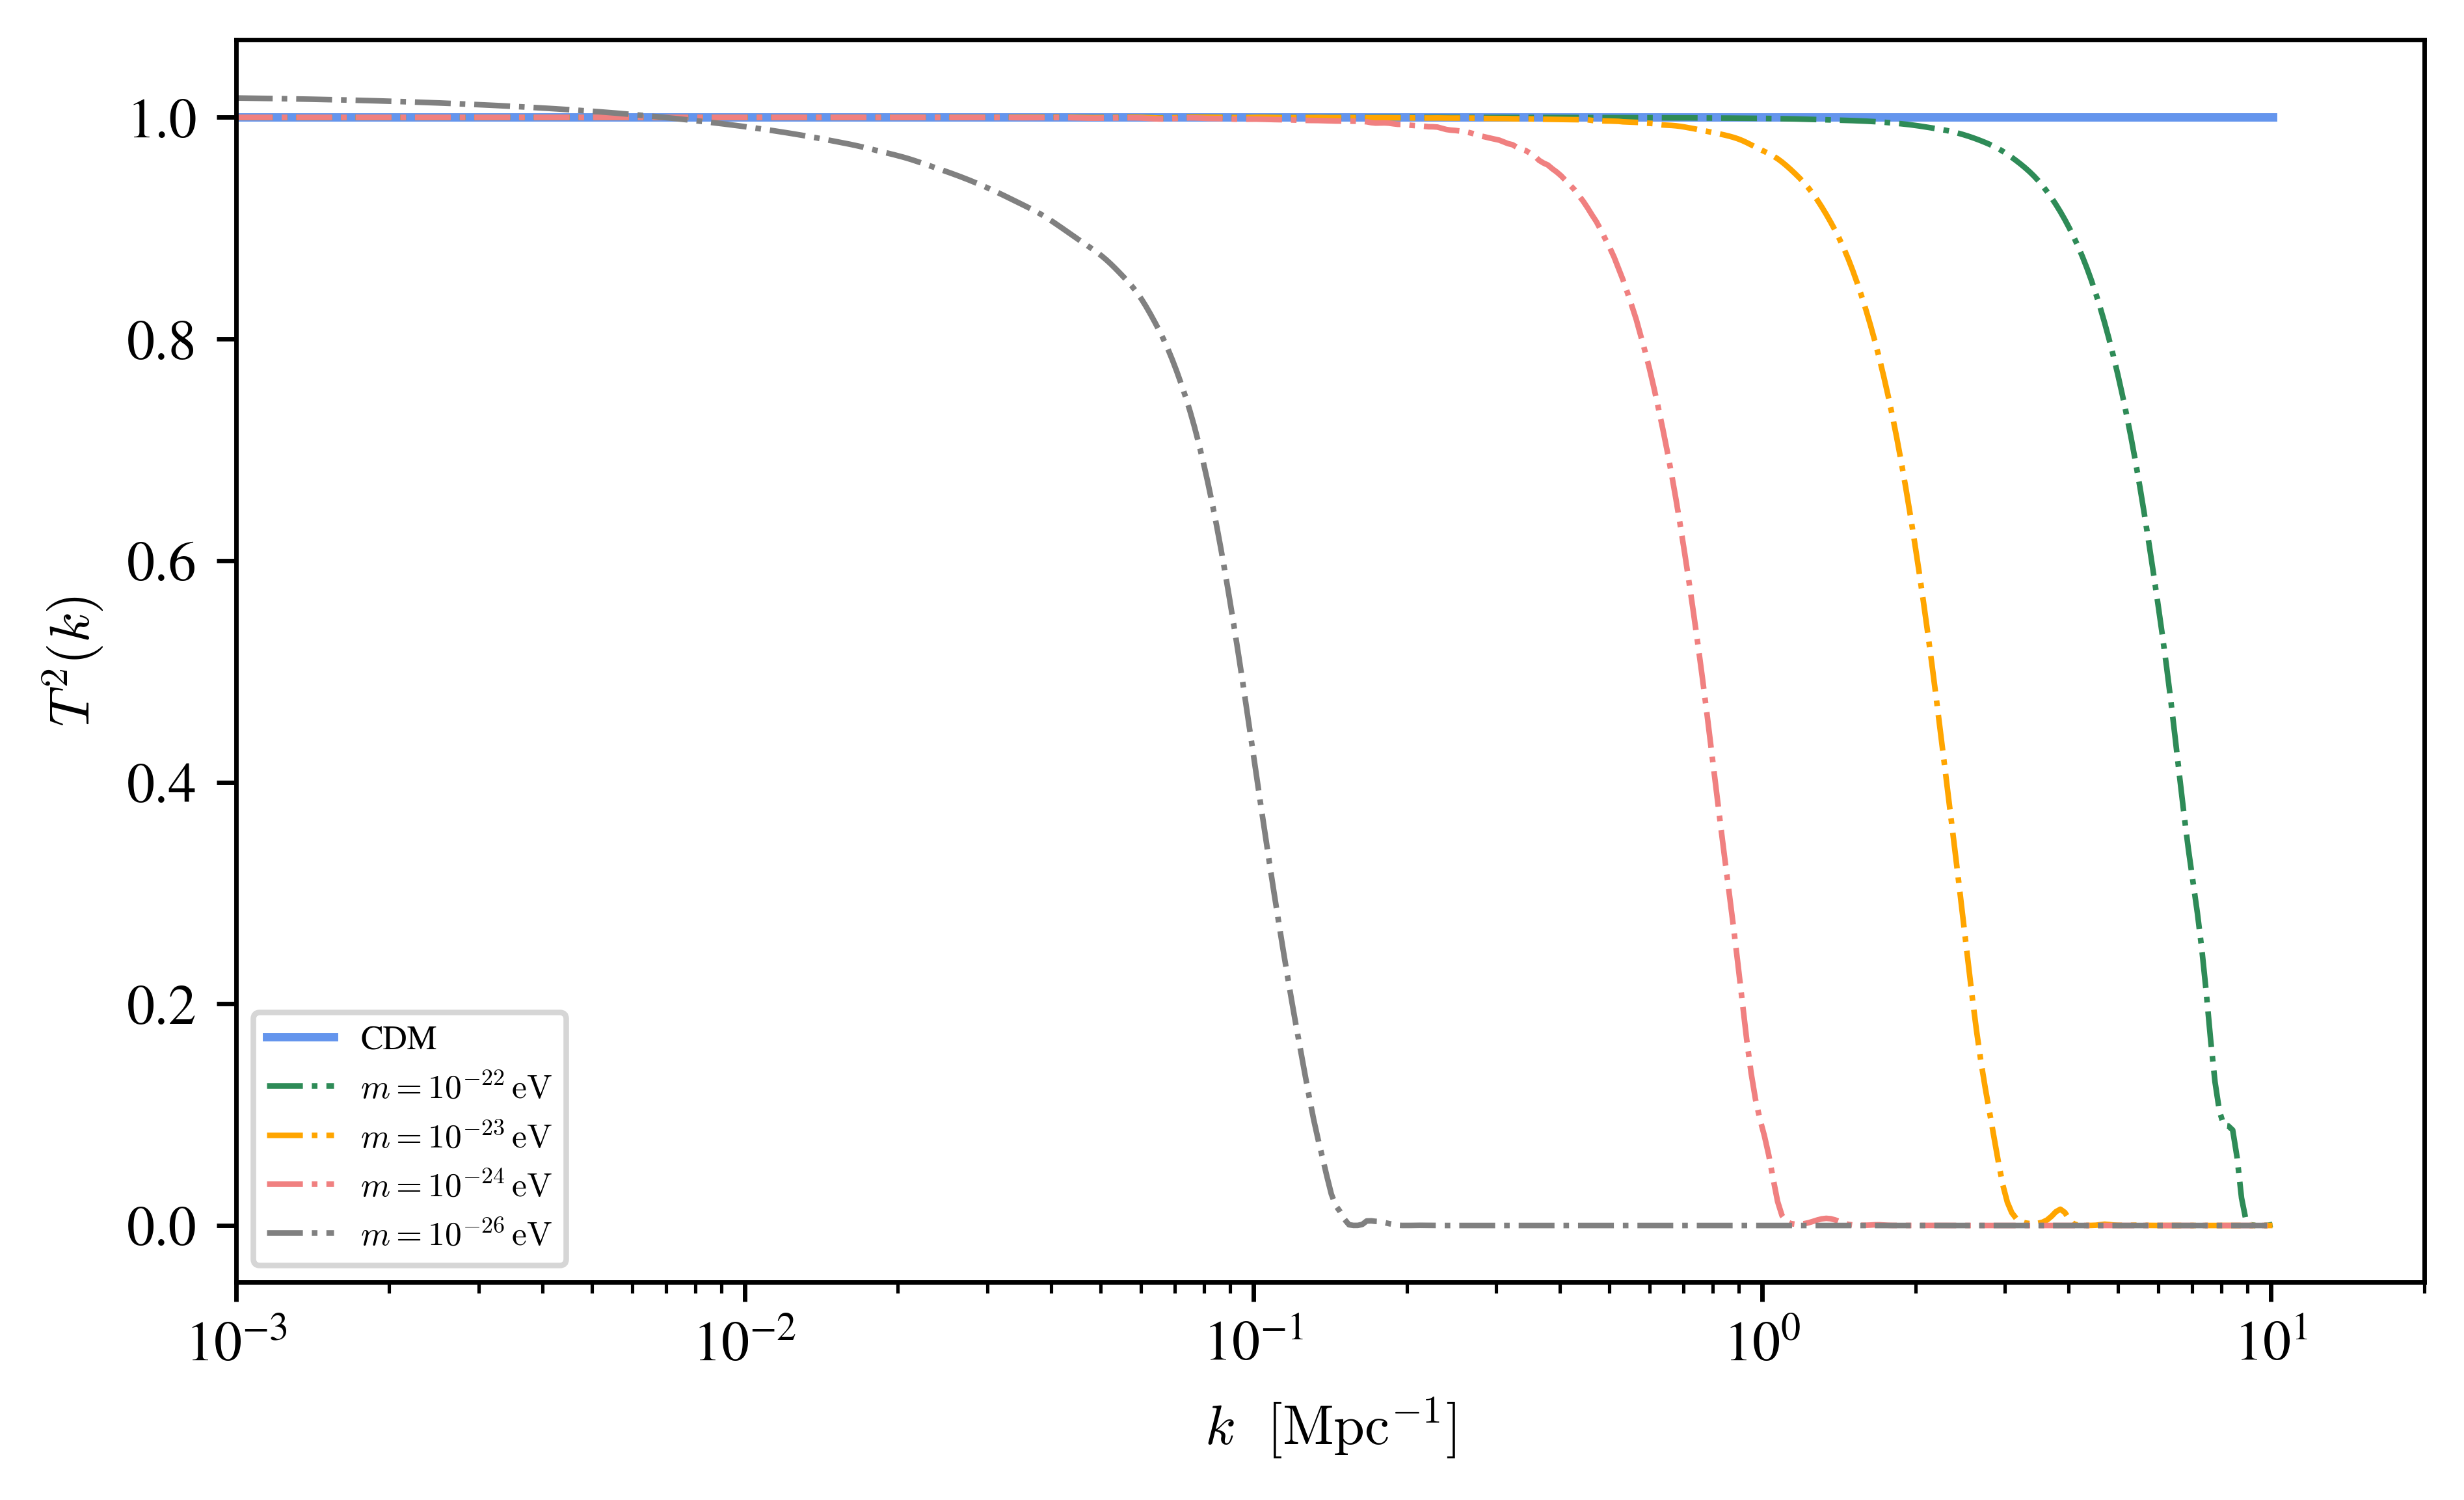

In [83]:
#Plot
# plot T(k)
plt.figure(221, figsize=(7.0,4.0), dpi=620)
plt.xscale('log');
#plt.yscale('log');
plt.xlim(10**-3,2*10**1)
#plt.ylim(10**-7,5*10**4)
plt.xlabel(r'$k \,\,\,\, [\mathrm{Mpc}^{-1}]$')
plt.ylabel(r'$T^2(k)$')
#plt.plot(kk,(1/(2*pi**2))*(kk**3)*Pk,'b-')
# CDM
plt.plot(k, Pk/Pk, color='cornflowerblue', linestyle='-',linewidth=1.5,label='CDM')
# plt.text(0.8*10**(2), 6*10**0, 'CDM', color='cornflowerblue', alpha=1, ha='center', va='center', rotation='horizontal', fontdict=font)

#Fuzzy DM
plt.plot(Fuzzyk22,FuzzyPk22/Pk, color='seagreen', linestyle='-.',linewidth=1,label='$m= 10^{-22}\,\mathrm{eV}$')
plt.plot(Fuzzyk23,FuzzyPk23/Pk, color='orange', linestyle='-.',linewidth=1,label='$m= 10^{-23}\,\mathrm{eV}$')
plt.plot(Fuzzyk24,FuzzyPk24/Pk, color='lightcoral', linestyle='-.',linewidth=1,label='$m=  10^{-24}\,\mathrm{eV}$')
plt.plot(Fuzzyk26,FuzzyPk26/Pk, color='gray', linestyle='-.',linewidth=1,label='$m=  10^{-26}\,\mathrm{eV}$')

plt.legend(loc='lower left',prop={'size': 6})
plt.show()

**Question**: What difference can you notice with respect to the LCDM transfer function?

##### Warm DM

To compare lets obtain run another DM model: **WDM**

For thet we need ot use CLASS (luckily we have that installed)

In [ ]:
# WDM 4keV
# create instance of the class "Class"
WarmDM1 = Class()
# pass input parameters
WarmDM1.set({'omega_b':0.022032,'h':0.67556,'A_s':2.215e-9,'n_s':0.9619,'tau_reio':0.0925, 'Omega_cdm':10.e-20,
            'N_ncdm':1, 'use_ncdm_psd_files':0, 'm_ncdm':4000, 'Omega_ncdm':0.25, 'T_ncdm':0.71611, 'ksi_ncdm':0,
            'deg_ncdm':1.0, 'Quadrature strategy':3, 'Number of momentum bins':15,
            'ncdm_fluid_approximation':3, 'l_max_ncdm':15,'k_per_decade_for_pk':100})
WarmDM1.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':1000.0})
# run class
WarmDM1.compute()

In [ ]:
# Warm DM m=4keV
# get P(k) at redhsift z=0
kkwdm = np.logspace(-4,np.log10(1000),100000) # k in h/Mpc
PkWDM1 = [] # P(k) in (Mpc/h)**3
h = LambdaCDM.h() # get reduced Hubble for conversions to 1/Mpc
for k in kkwdm:
#    Pk.append(LambdaCDM.pk(k*h,0.)*h**3) # function .pk(k,z)
    PkWDM1.append(WarmDM1.pk(k,0.)) # function .pk(k,z)

In [ ]:
#Plot
# plot T(k)
plt.figure(221, figsize=(7.0,4.0), dpi=620)
plt.xscale('log');
#plt.yscale('log');
plt.xlim(10**-3,2*10**2)
#plt.ylim(10**-7,5*10**4)
plt.xlabel(r'$k \,\,\,\, [\mathrm{Mpc}^{-1}]$')
plt.ylabel(r'$T(k)$')
#plt.plot(kk,(1/(2*pi**2))*(kk**3)*Pk,'b-')
# CDM
plt.plot(khLCDM,(1/(2*pi**2))*(khLCDM**3)*pkLCDM, color='cornflowerblue', linestyle='-',linewidth=1.5,label='CDM')
# plt.text(0.8*10**(2), 6*10**0, 'CDM', color='cornflowerblue', alpha=1, ha='center', va='center', rotation='horizontal', fontdict=font)

# Fuzzy DM
plt.plot(Fuzzyk22T,FuzzyTk22, color='seagreen', linestyle='-.',linewidth=1,label='$m= 10^{-22}\,\mathrm{eV}$')
plt.plot(Fuzzyk23T,FuzzyTk23, color='orange', linestyle='-.',linewidth=1,label='$m= 10^{-23}\,\mathrm{eV}$')
plt.plot(Fuzzyk24T,FuzzyTk24, color='lightcoral', linestyle='-.',linewidth=1,label='$m=  10^{-24}\,\mathrm{eV}$')
plt.plot(Fuzzyk26T,FuzzyTk26, color='gray', linestyle='-.',linewidth=1,label='$m=  10^{-26}\,\mathrm{eV}$')

# Warm DM
plt.plot(kkwdm,PkWDM1, color='orange', linestyle='--',linewidth=1,label='$m= 10^{-20}\,\mathrm{eV}$')

plt.legend(loc='lower right',prop={'size': 6})
plt.show()

**IMPORTANT**:

We can see that the signatures of suppression of the power spectrum, one of the main characteristics of FDM is **degenerate** with the signature of WDM, although the mechanism that cause this suppression are different.

We can also see this in the matter power spectrum

In [ ]:
# plot P(k)
plt.figure(221, figsize=(7.0,4.0), dpi=620)
plt.xscale('log');
plt.yscale('log');
plt.xlim(10**-3,2*10**2)
#plt.ylim(10**-7,5*10**4)
plt.xlabel(r'$k \,\,\,\, [\mathrm{Mpc}^{-1}]$')
plt.ylabel(r'$P(k)$')
#plt.plot(kk,(1/(2*pi**2))*(kk**3)*Pk,'b-')
# CDM
plt.plot(khLCDM,(1/(2*pi**2))*(khLCDM**3)*pkLCDM, color='cornflowerblue', linestyle='-',linewidth=1.5,label='CDM')
plt.text(0.8*10**(2), 6*10**0, 'CDM', color='cornflowerblue', alpha=1, ha='center', va='center', rotation='horizontal', fontdict=font)

#Fuzzy DM
plt.plot(Fuzzyk22,(1/(2*pi**2))*(Fuzzyk22**3)*FuzzyPk22, color='seagreen', linestyle='-.',linewidth=1,label='$m= 10^{-22}\,\mathrm{eV}$')
plt.plot(Fuzzyk23,(1/(2*pi**2))*(Fuzzyk23**3)*FuzzyPk23, color='orange', linestyle='-.',linewidth=1,label='$m= 10^{-23}\,\mathrm{eV}$')
plt.plot(Fuzzyk24,(1/(2*pi**2))*(Fuzzyk24**3)*FuzzyPk24, color='lightcoral', linestyle='-.',linewidth=1,label='$m=  10^{-24}\,\mathrm{eV}$')
plt.plot(Fuzzyk26,(1/(2*pi**2))*(Fuzzyk26**3)*FuzzyPk26, color='gray', linestyle='-.',linewidth=1,label='$m=  10^{-26}\,\mathrm{eV}$')

#Warm DM
plt.plot(kkwdm,(1/(2*pi**2))*(kkwdm**3)*PkWDM1, color='orange', linestyle='--',linewidth=1,label='$m= 10^{-20}\,\mathrm{eV}$')

# Adding the lines and text
# horizontal; linear vs non-linear
plt.text(1.5*10**(-3), 1.75, 'non-linear', color='gray', ha='left', va='center', rotation='horizontal', fontdict=font)
plt.text(1.5*10**(-3), 0.6, 'linear', color='gray', ha='left', va='center', rotation='horizontal', fontdict=font)
plt.axhline(1, 10**-3,10**3, color='gray', linestyle='--', alpha=0.5, linewidth=0.6)

# Scale
plt.text(2*10**(-3), 1.5*10**4, 'CMB/LSS', color='gray', ha='left', va='top', rotation='horizontal', fontdict=font5)
plt.text(6*10**(-2), 1.5*10**4, 'Cluster', color='gray', ha='left', va='top', rotation='horizontal', fontdict=font5)
plt.text(1*10**(0), 1.5*10**4, 'Galactic', color='gray', ha='left', va='top', rotation='horizontal', fontdict=font5)
plt.text(8*10**(0), 1.5*10**4, 'Satellite galaxies/\n substructures', color='gray', ha='left', va='top', rotation='horizontal', fontdict=font5)

# vertical separation scales
plt.axvspan(2, 10**3, color='whitesmoke')

plt.legend(loc='lower right',prop={'size': 6})
plt.show()

From this plot we can obtin the WDM limit: $m_{\mathrm{WDM}} \gtrsim \mathrm{keV}$.

This comes from the fact that the suppression of the matter PS cannot happen in scales $k < 10-20 \, \mathrm{Mpc}^{-1}$, given the LSS observations. The same reason we use to bounds on the minimum mass of FDM!

PS: Careful trying to run lower masses. It can take a long time!

**Question**: Are these differences observable?

Maybe not for FDM and WDM. But other models that suppress structures also have other observational signature. Ex. Atomic DM

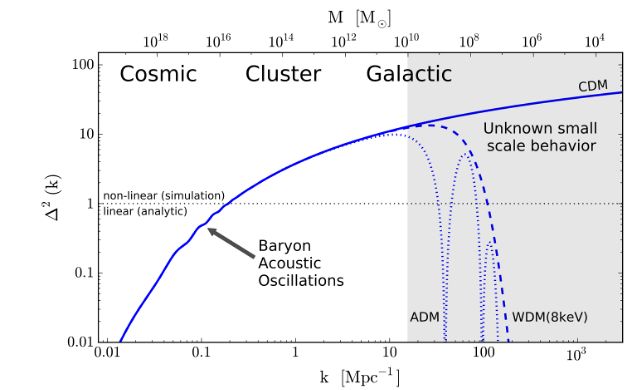

$\Rightarrow$ Dark acoustic oscillations

### Degeneracy 2

Let's now change the fraction of FDM (lines 47 and 60).



We are going to make 3 cases:

$$m_a = 10^{-26} \,\mathrm{eV} \qquad \Omega_a h^2 = 0.007 \, \text{(~1.5% DM)}$$

$$m_a = 10^{-26} \,\mathrm{eV} \qquad \Omega_a h^2 = 0.033 \, \text{(~ 7% DM)}$$

$$m_a = 10^{-24} \,\mathrm{eV} \qquad \Omega_a h^2 = 0.109 \, \text{(100% DM)}$$

You can try to edit the ini file yourself in the same way we did it above. Or, to be faster, you can just download files I prepared beforehand

#### test

In [ ]:
#!pip install gdown

In [85]:
#cd inifiles

/content/axionCAMB/inifiles


In [86]:
# Get the ini fiels
# $$m_a = 10^{-26} \,\mathrm{eV} \qquad \Omega_a h^2 = 0.007 \, \text{(~1.5% DM)}$$
#!gdown https://drive.google.com/file/d/1UMDLkSEkkux1SZEXyXpBcwj4gN70jYv-/view?usp=drive_link

/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:35: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1UMDLkSEkkux1SZEXyXpBcwj4gN70jYv-
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1UMDLkSEkkux1SZEXyXpBcwj4gN70jYv-/view?usp=drive_link
To: /content/axionCAMB/inifiles/view?usp=drive_link
75.7kB [00:00, 57.4MB/s]


In [87]:
# Get the ini fiels
# $$m_a = 10^{-26} \,\mathrm{eV} \qquad \Omega_a h^2 = 0.033 \, \text{(~7% DM)}$$
#!gdown https://drive.google.com/file/d/1zMjuijGoSl6IFoJECkcpBZSTc_4ZfJGB/view?usp=drive_link

/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:35: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1zMjuijGoSl6IFoJECkcpBZSTc_4ZfJGB
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1zMjuijGoSl6IFoJECkcpBZSTc_4ZfJGB/view?usp=drive_link
To: /content/axionCAMB/inifiles/view?usp=drive_link
75.7kB [00:00, 37.3MB/s]


In [90]:
#cd ..

/content/axionCAMB


#### Run axionCAMB with these inifiles

In [93]:
cp inifiles/Fuzzy_26.ini inifiles/fuzzy_26_frac_1.ini

In [94]:
cp inifiles/Fuzzy_26.ini inifiles/fuzzy_26_frac_7.ini

Edit the ini files:

Line 4: output_root = output/fuzzy_26_fraction_1 or output_root = output/fuzzy_26_fraction_7

Line 26: use_axfrac=T

Line 35 e 36:
omdah2 = 0.007
axfrac = 0.015

Or

omdah2 = 0.033
axfrac = 0.07

In [95]:
!./camb /content/axionCAMB/inifiles/fuzzy_26_frac_1.ini

(w0, wa) = (-1.00000,  0.00000)
Reion redshift       =   6.145
Om_b h^2             =  0.022220
Om_c h^2             =  0.006895
Om_nu h^2            =  0.000600
Om_Lambda            =  0.934102
H0                  = 67.310000
Om_ax h^2            =  0.000105
a_osc               =  0.53E-04
ma/eV            =  0.10E-25
Om_K                 =  0.000000
Om_m (1-Om_K-Om_L)   =  0.065898
100 theta (CosmoMC)  =  0.764815
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  20.369
zstar                =  1077.15
r_s(zstar)/Mpc       =  192.16
100*theta            =  0.765015
zdrag                =  1048.91
r_s(zdrag)/Mpc       =  196.22
k_D(zstar) Mpc       =  0.0992
100*theta_D          =  0.126119
tau_recomb/Mpc       =  375.84  tau_now/Mpc =  25495.6
 at z =    0.00000000      sigma8 (all matter)=   9.43784416E-02
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FL

In [96]:
!./camb /content/axionCAMB/inifiles/fuzzy_26_frac_7.ini

(w0, wa) = (-1.00000,  0.00000)
Reion redshift       =   7.356
Om_b h^2             =  0.022220
Om_c h^2             =  0.030690
Om_nu h^2            =  0.000600
Om_Lambda            =  0.876715
H0                  = 67.310000
Om_ax h^2            =  0.002310
a_osc               =  0.54E-04
ma/eV            =  0.10E-25
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.123285
100 theta (CosmoMC)  =  0.882069
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  17.646
zstar                =  1080.94
r_s(zstar)/Mpc       =  176.21
100*theta            =  0.882320
zdrag                =  1052.07
r_s(zdrag)/Mpc       =  179.76
k_D(zstar) Mpc       =  0.1113
100*theta_D          =  0.141339
tau_recomb/Mpc       =  343.83  tau_now/Mpc =  20315.0
 at z =    0.00000000      sigma8 (all matter)=  0.287392288    
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FL

In [98]:
# FDM fraction
Fuzzyk26_frac1, FuzzyPk26_frac1 = loadtxt('/content/axionCAMB/output/fuzzy_26_frac_1_matterpower.dat', usecols=(0,1), unpack=True)
Fuzzyk26_frac7, FuzzyPk26_frac7 = loadtxt('/content/axionCAMB/output/fuzzy_26_frac_7_matterpower.dat', usecols=(0,1), unpack=True)

Read the values of S8 for each of these runs. For that go on output and open *

Plot

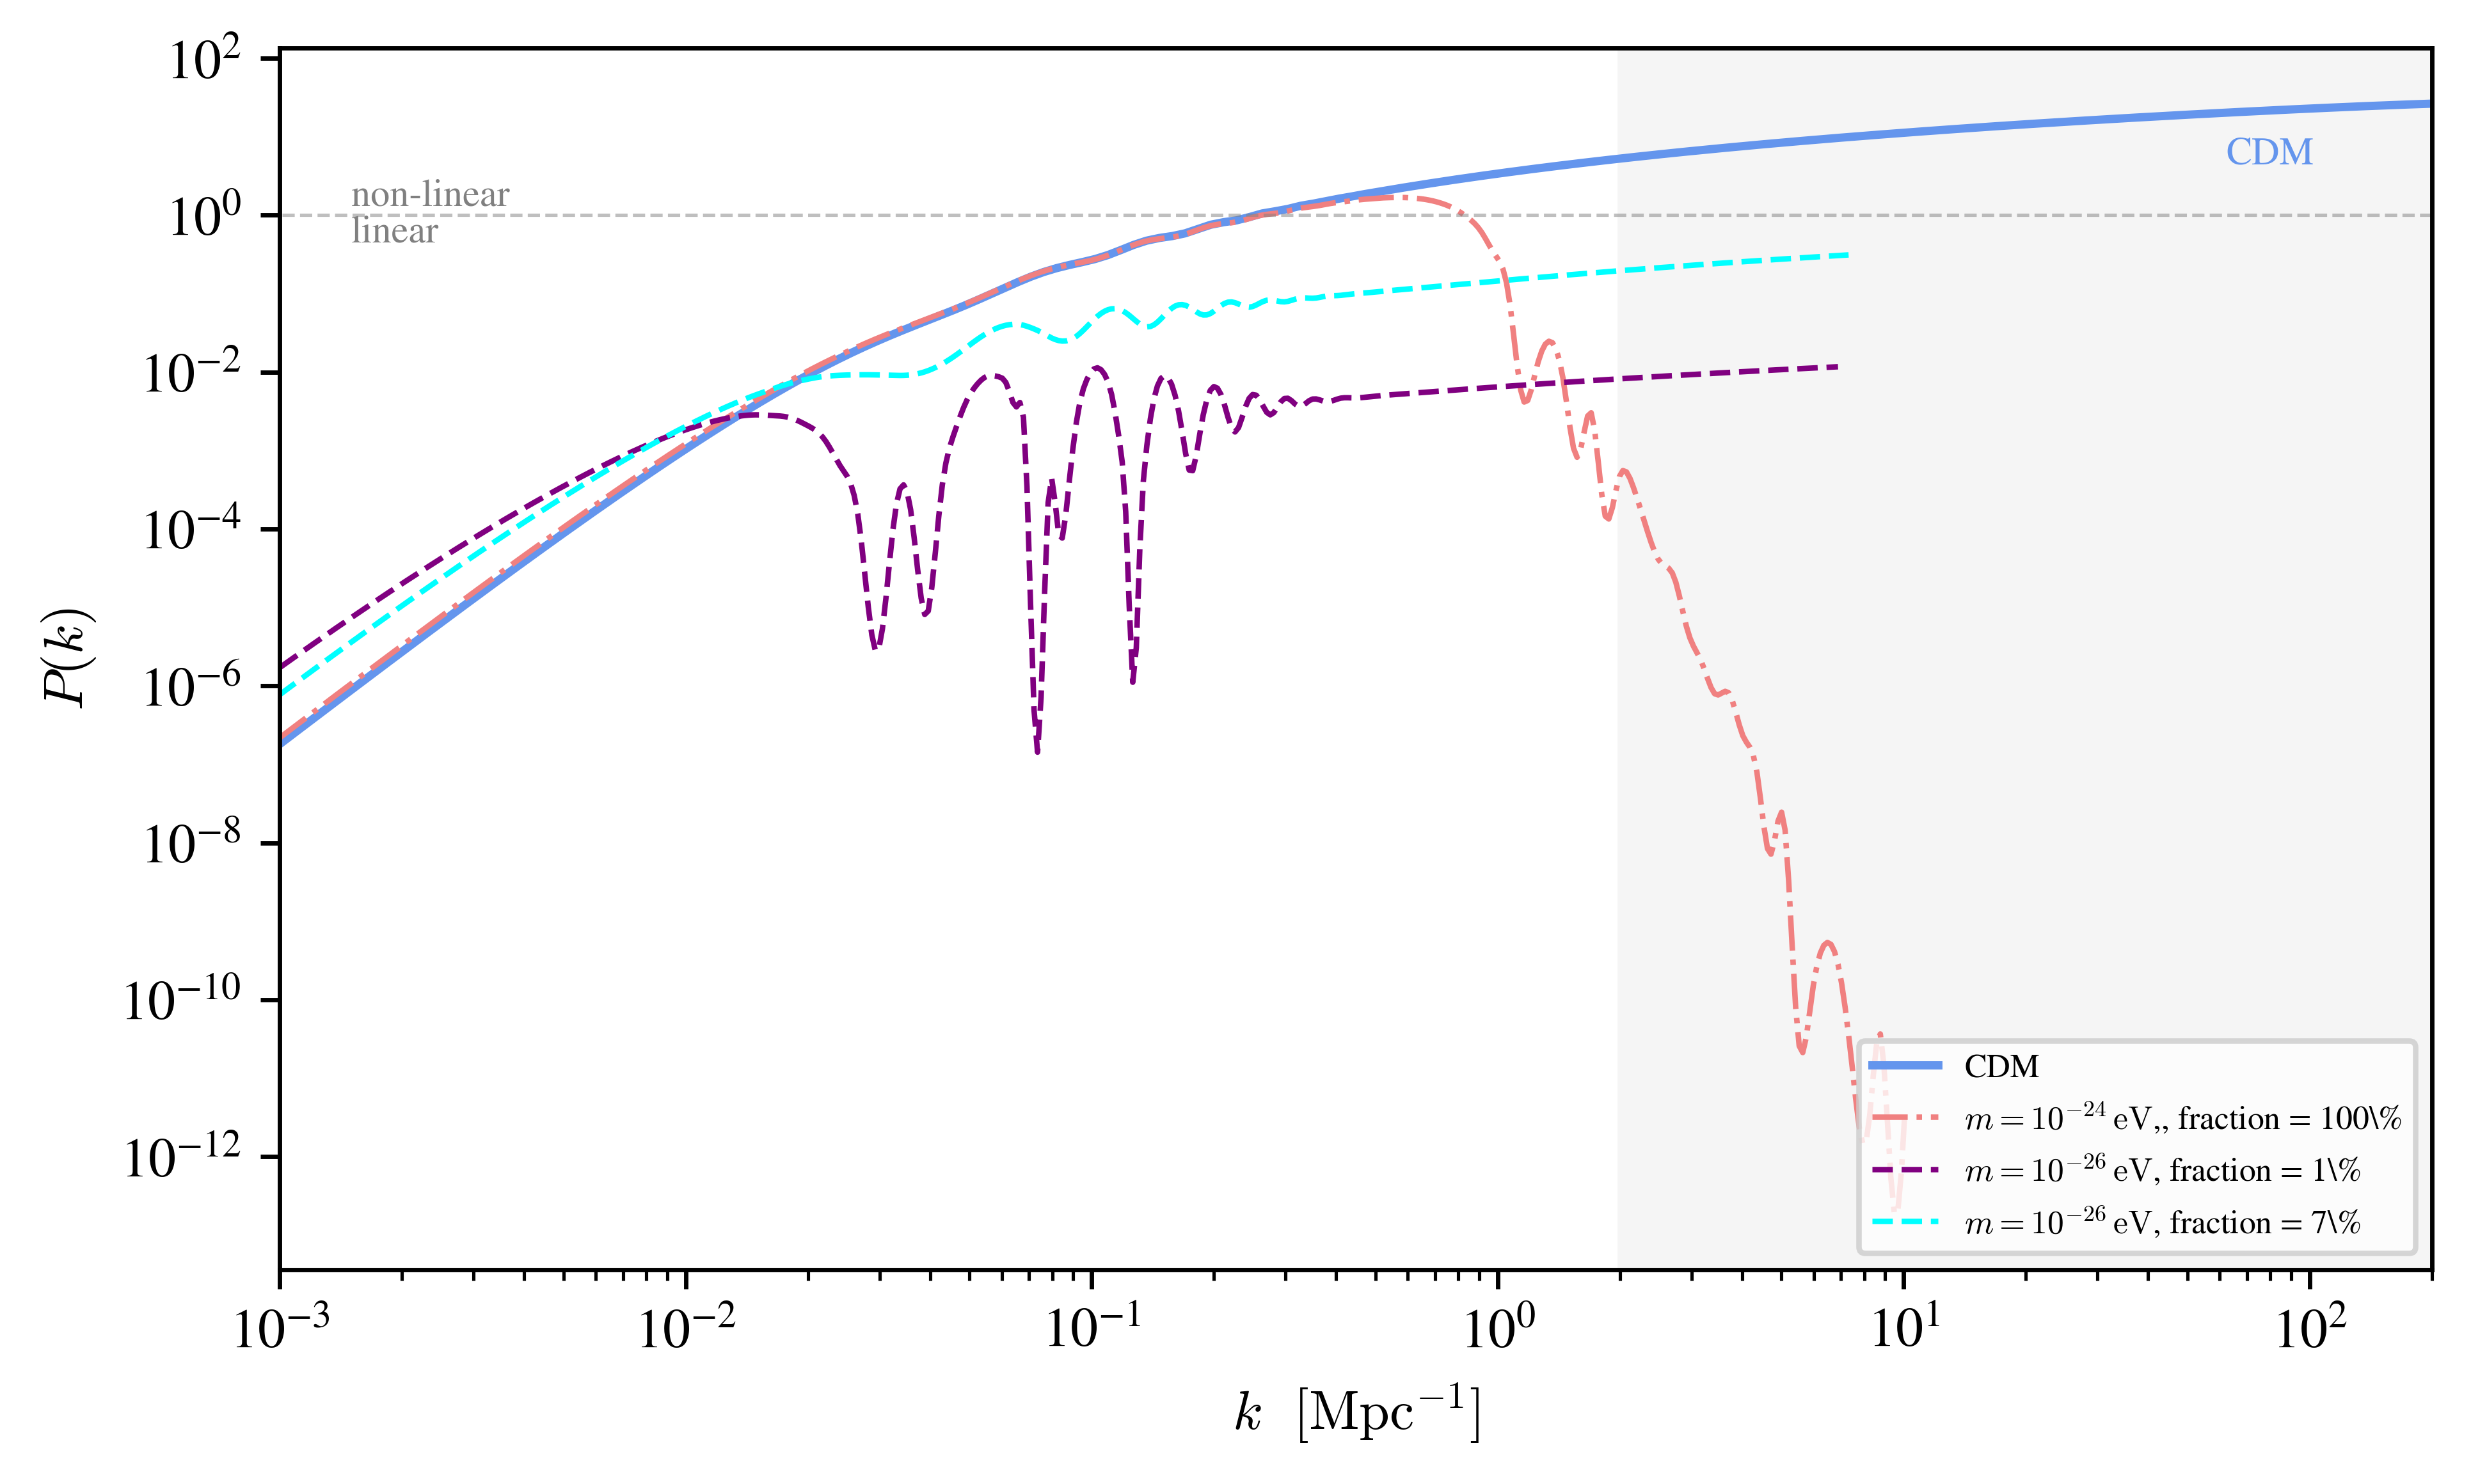

In [100]:
# plot P(k)
plt.figure(221, figsize=(7.0,4.0), dpi=620)
plt.xscale('log');
plt.yscale('log');
plt.xlim(10**-3,2*10**2)
#plt.ylim(10**-7,5*10**4)
plt.xlabel(r'$k \,\,\,\, [\mathrm{Mpc}^{-1}]$')
plt.ylabel(r'$P(k)$')
#plt.plot(kk,(1/(2*pi**2))*(kk**3)*Pk,'b-')
# CDM
plt.plot(khLCDM,(1/(2*pi**2))*(khLCDM**3)*pkLCDM, color='cornflowerblue', linestyle='-',linewidth=1.5,label='CDM')
plt.text(0.8*10**(2), 6*10**0, 'CDM', color='cornflowerblue', alpha=1, ha='center', va='center', rotation='horizontal', fontdict=font)

#Fuzzy DM
plt.plot(Fuzzyk24,(1/(2*pi**2))*(Fuzzyk24**3)*FuzzyPk24, color='lightcoral', linestyle='-.',linewidth=1,label='$m=  10^{-24}\,\mathrm{eV}$,, fraction = 100\%')

#Fuzzy DM - fraction
plt.plot(Fuzzyk26_frac1,(1/(2*pi**2))*(Fuzzyk26_frac1**3)*FuzzyPk26_frac1, color='purple', linestyle='--',linewidth=1,label='$m= 10^{-26}\,\mathrm{eV}$, fraction = 1\%')
plt.plot(Fuzzyk26_frac7,(1/(2*pi**2))*(Fuzzyk26_frac7**3)*FuzzyPk26_frac7, color='cyan', linestyle='--',linewidth=1,label='$m= 10^{-26}\,\mathrm{eV}$, fraction = 7\%')


# Adding the lines and text
# horizontal; linear vs non-linear
plt.text(1.5*10**(-3), 1.75, 'non-linear', color='gray', ha='left', va='center', rotation='horizontal', fontdict=font)
plt.text(1.5*10**(-3), 0.6, 'linear', color='gray', ha='left', va='center', rotation='horizontal', fontdict=font)
plt.axhline(1, 10**-3,10**3, color='gray', linestyle='--', alpha=0.5, linewidth=0.6)

# vertical separation scales
plt.axvspan(2, 10**3, color='whitesmoke')

plt.legend(loc='lower right',prop={'size': 6})
plt.show()

We can see that mass is **degenerate** with fraction.

Also, reducing the fraction allow us to have a model that gives changes of the power spectrum on even large scales but **small** ones, still allowed by data!

#### S8 tension

We are going to see how even small changes in the power spectrum caused by a different DM model (FDM) can lead to observational signatures.

Ref.: Rogers et al 2023

In [ ]:
# plot P_{FDM}(k)/P_{LCDM}(k)
plt.figure(221, figsize=(7.0,4.0), dpi=620)
plt.xscale('log');
plt.yscale('log');
#plt.xlim(10**-3,2*10**2)
#plt.ylim(10**-7,5*10**4)
plt.xlabel(r'$k \,\,\,\, [\mathrm{Mpc}^{-1}]$')
plt.ylabel(r'$\frac{P_{\mathrm{FDM}}(k)}{P_{\mathrm{\Lambda CDM}}(k)}$')

# CDM
plt.plot(khLCDM,(1/(2*pi**2))*(khLCDM**3)*pkLCDM/((1/(2*pi**2))*(khLCDM**3)*pkLCDM), color='cornflowerblue', linestyle='-',linewidth=1.5,label='CDM')

#Fuzzy DM
plt.plot(Fuzzyk24,(1/(2*pi**2))*(Fuzzyk24**3)*FuzzyPk24/((1/(2*pi**2))*(khLCDM**3)*pkLCDM), color='lightcoral', linestyle='-.',linewidth=1,label='$m=  10^{-24}\,\mathrm{eV}$')

#Fuzzy DM - fraction
plt.plot(Fuzzyk26_frac1,(1/(2*pi**2))*(Fuzzyk26_frac1**3)*FuzzyPk26_frac1/((1/(2*pi**2))*(khLCDM**3)*pkLCDM), color='purple', linestyle='--',linewidth=1,label='$m= 10^{-20}\,\mathrm{eV}$')
plt.plot(Fuzzyk26_frac7,(1/(2*pi**2))*(Fuzzyk26_frac7**3)*FuzzyPk26_frac7/((1/(2*pi**2))*(khLCDM**3)*pkLCDM), color='cyan', linestyle='--',linewidth=1,label='$m= 10^{-20}\,\mathrm{eV}$')

plt.legend(loc='lower right',prop={'size': 6})
plt.show()